<a href="https://colab.research.google.com/github/Dillonreed/3831-Coursework-Part-1/blob/main/3831_Coursework_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3831 Coursework Part 1

## General Imports

In [139]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

## Plotting Utility

In [140]:
## plotting utility

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type="boxplot", title=None):

    print("plotting columns {c}".format(c=list(columns)))

    if type not in {"boxplot", "dkeplot"}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == "boxplot":
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == "boxplot":
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1

    else:
    # general case of a 2D grid
        i=j=0
        for c in columns:
            print("column {c}".format(c=c))
            if type == "boxplot":
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


## Outlier Detection

### Reading Data In

In [141]:
houses = pd.read_csv("https://raw.githubusercontent.com/Dillonreed/3831-Coursework-Part-1/main/houses.csv", header=0)

In [142]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### Data Understanding

#### Numerical Description


In [143]:
# Numerically describing the dataset to show the current state of the dataset
houses.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


#### Visual Description

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


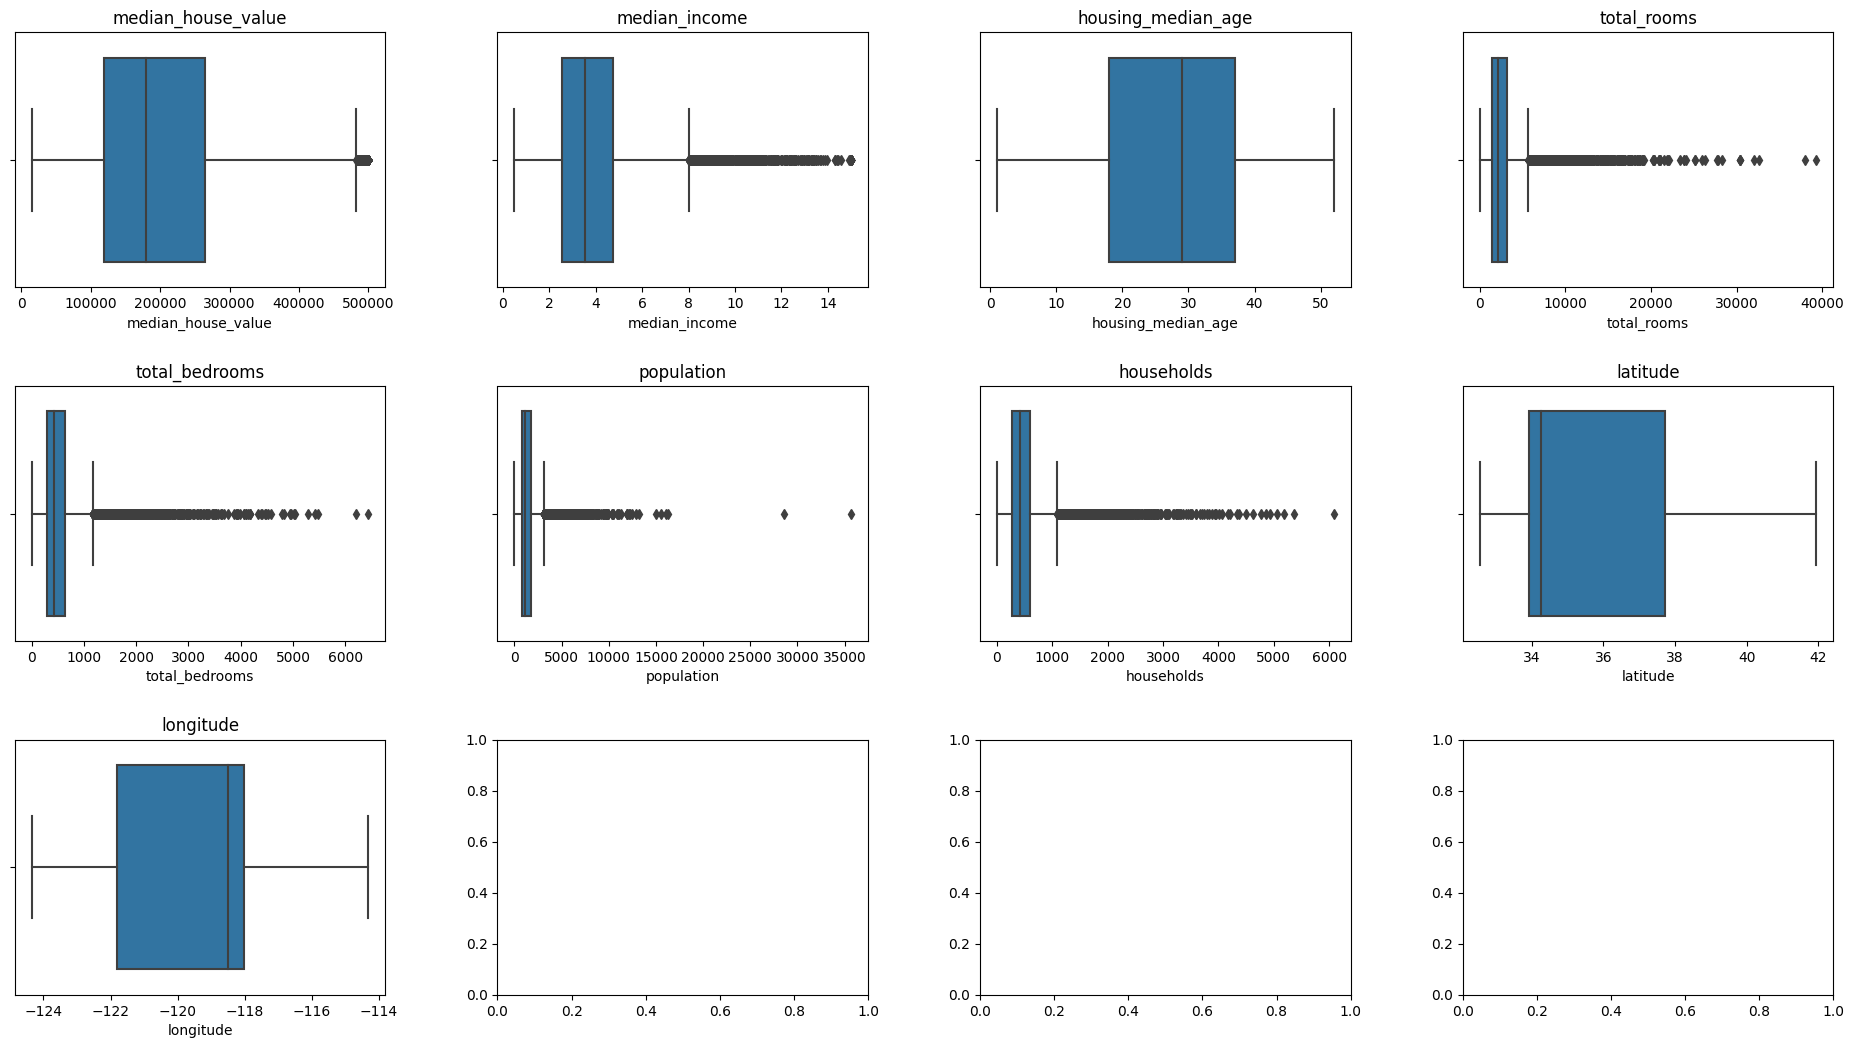

In [144]:
# Plotting box plots of the dataset to visually show the current state of
# the dataset
plot_distributions(houses, houses.columns)

#### Description and Understanding of the Dataset


Description of Numerical Statistics
* The dataset has 20,640 records.
* The median house value ranges from 14,999 to 500,001, with a mean of 206,855.82.
* The median income ranges from 0.5 to 15, with a mean of 3.87.
* Housing median age ranges from 1 to 52, with a mean of 28.64.
* Total rooms range from 2 to 39,320, with a mean of 2,635.76.
* Total bedrooms range from 1 to 6,445, with a mean of 537.90.
* Population ranges from 3 to 35,682, with a mean of 1,425.48.
* Households range from 1 to 6,082, with a mean of 499.54.
* Latitude ranges from 32.54 to 41.95, with a mean of 35.63.
* Longitude ranges from -124.35 to -114.31, with a mean of -119.57.

Description of Boxplots of Features from the Dataset

From looking at the boxplots, I can see that the dataset looks to be quite varied which would be beneficial for the training of any potential future models.

Distributed among the features there looks to be quite a large amount of data that lies beyond 1.5 x IQR which could indicate those datapoints to be outliers.
* The Median house value boxplot appears to have quite a few values greater than 1.5 x IQR.
* The Median income boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Housing median age boxplot does not have any values greater than 1.5 x IQR.
* The Total rooms again boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Total bedrooms boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Population boxplot has a large number of values greater than 1.5 x IQR.
* The Households boxplot has large number of values greater than 1.5 x IQR.
* The Latitude boxplot does not have any values greater than 1.5 x IQR.
* The Longitude boxplot does not have any values greater than 1.5 x IQR.

Understanding of the Dataset
* The dataset has a large number of records that will be useful for the training/validation of any potential future models, however with the large amount of data points lying greater than 1.5 x the IQR this could suggest there could be a high amount of outliers.
* The data appears to have a good degree of variance which should lead to good generalizability for any potential future models.
* Each record is the houshold as well as financial information about a geographic area located using latitude/longitude.
* From looking at the spread of the Latitude/Longitude the datapoints appear to be located primarily within the state of California in the United States of America.


### Feature Extraction

#### Normalization of Features

In [145]:
# Normalizing features so better conclusions can be drawn

# Create a copy of the houses dataset
normalizedHouses = houses

# Normalizing numerical features for houses by dividing them by the number of
# households to estimate a mean for the geographic area
normalizedHouses["median_house_value_per_household"] = normalizedHouses["median_house_value"]/houses["households"]
normalizedHouses["median_income_per_household"] = normalizedHouses["median_income"]/houses["households"]
normalizedHouses["total_rooms_per_household"] = normalizedHouses["total_rooms"]/houses["households"]
normalizedHouses["total_bedrooms_per_household"] = normalizedHouses["total_bedrooms"]/houses["households"]
normalizedHouses["population_per_household"] = normalizedHouses["population"]/houses["households"]

# Drop the normalized features from the normalized dataset
normalizedHouses = houses.drop(columns=["median_house_value",  "median_income", "total_rooms", "total_bedrooms"])

In [146]:
normalizedHouses.columns

Index(['housing_median_age', 'population', 'households', 'latitude',
       'longitude', 'median_house_value_per_household',
       'median_income_per_household', 'total_rooms_per_household',
       'total_bedrooms_per_household', 'population_per_household'],
      dtype='object')

#### Vizualization of Normalized Dataset

plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]


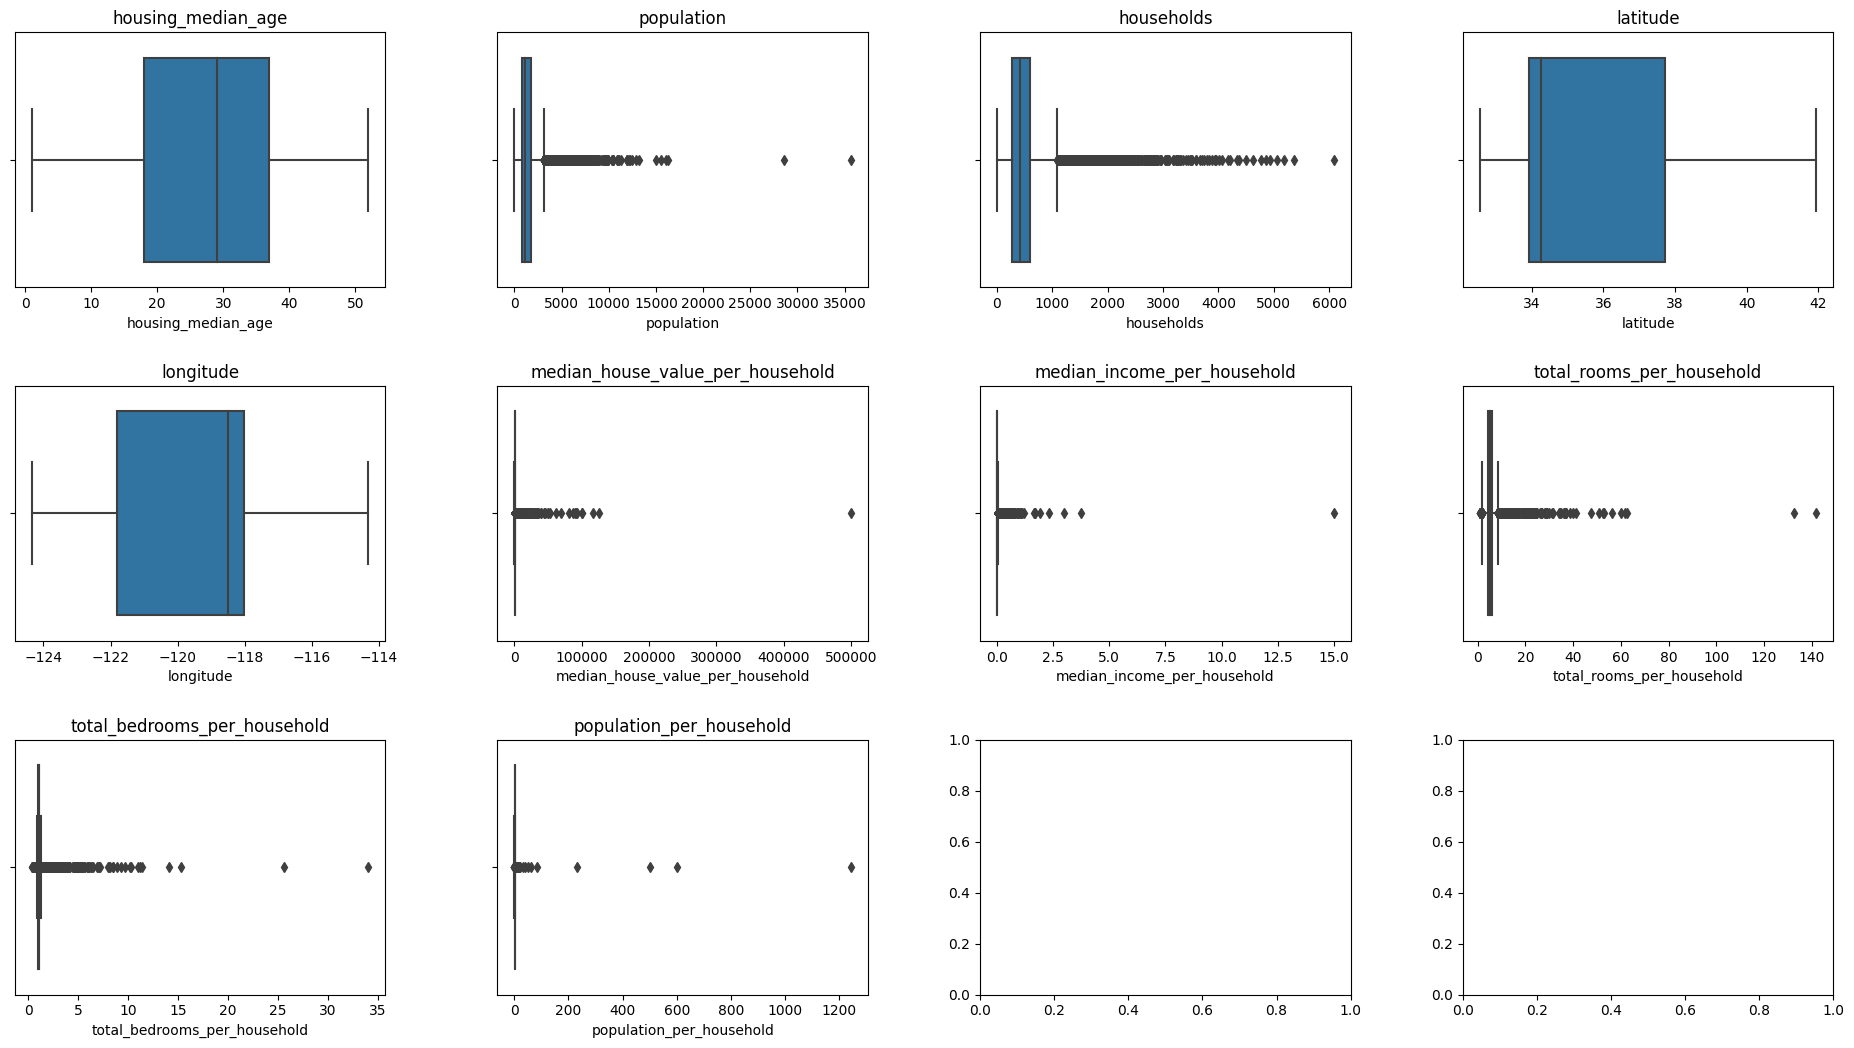

In [147]:
# Vizualising the normalized dataset to see the change now the numerical
# features have been normalized
plot_distributions(normalizedHouses, normalizedHouses.columns)

#### Rationale for Feature Extraction

I have looked at both the findings from the Exploratory Data Analysis (EDA) as well as the vizualisation of the normalized features, to support my identification of useful features for outlier detection.

I believe the Features that would be useful for identifying outliers would be :
* "population", "households", "population_per_household" - Geographic areas with exceptionally low or high values could indicate outliers.
* "median_house_value_per_household", "median_income_per_household", "total_rooms_per_household", "total_bedrooms_per_household" - Extreme values in these features could indicate outliers, however this could also highlight particular unique cases in the data.

I believe the below features would not be useful for identifying outliers :
* "latitude", "longitude" - Locations far away from the majority would likely be considered outliers to improve the accuracy of the model if it was intended to be trained for this specific area, however there does not seem to be many values greater than 1.5 x IQR for this dataset.
* "housing_median_age" - Housing age is typically a continuous variable and so extreme values could identify outliers. However again in this dataset there does not seem to be many values greater than 1.5 x IQR.

### Non-Algorithmic Outlier Detection

#### Numerical Description of the Normalized Dataset

In [148]:
# Describing the normalized dataset to use statistical values for calculation of
# outlier decision boundary
normalizedHouses.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,499.539680,35.631861,-119.569704,809.734297,0.015870,5.429000,1.096675,3.070655
std,12.585558,1132.462122,382.329753,2.135952,2.003532,4451.787312,0.119325,2.474173,0.473911,10.386050
min,1.000000,3.000000,1.000000,32.540000,-124.350000,10.014154,0.000380,0.846154,0.333333,0.692308
25%,18.000000,787.000000,280.000000,33.930000,-121.800000,250.901889,0.005042,4.440716,1.006079,2.429741
50%,29.000000,1166.000000,409.000000,34.260000,-118.490000,431.332563,0.008447,5.229129,1.048780,2.818116
75%,37.000000,1725.000000,605.000000,37.710000,-118.010000,744.739846,0.014111,6.052381,1.099526,3.282261
max,52.000000,35682.000000,6082.000000,41.950000,-114.310000,500001.000000,15.000100,141.909091,34.066667,1243.333333


#### Calculation of Outlier Decision Boundaries

In [149]:
def calculateDecisionBoundaries(column):
    columnBoundaries = []

    # Boundary multiplier
    boundaryMultiplier = 1.5

    # Calculate important statistical values for the dataset
    thirdQuartile = normalizedHouses[column].quantile(0.75)
    firstQuartile = normalizedHouses[column].quantile(0.25)

    interQuartileRange =  thirdQuartile - firstQuartile

    # Calculate lower and upper bounds for the given column
    lowerBoundary = firstQuartile - (interQuartileRange * boundaryMultiplier)
    upperBoundary = thirdQuartile + (interQuartileRange * boundaryMultiplier)

    # Add boundaries to array
    columnBoundaries.append(lowerBoundary)
    columnBoundaries.append(upperBoundary)

    # Return the two boundaries
    return columnBoundaries


# Calculate decision boundaries for the features I identified as useful in the
# Feature Extraction section above

# population
populationBoundaries = calculateDecisionBoundaries("population")
populationLowerBoundary = populationBoundaries[0]
populationUpperBoundary = populationBoundaries[1]

# households
householdsBoundaries = calculateDecisionBoundaries("households")
householdsLowerBoundary = householdsBoundaries[0]
householdsUpperBoundary = householdsBoundaries[1]

# median_house_value_per_household
medianHouseValuePerHouseholdBoundaries = calculateDecisionBoundaries("median_house_value_per_household")
medianHouseValuePerHouseholdLowerBoundary = medianHouseValuePerHouseholdBoundaries[0]
medianHouseValuePerHouseholdUpperBoundary = medianHouseValuePerHouseholdBoundaries[1]

# median_income_per_household
medianIncomePerHouseholdBoundaries = calculateDecisionBoundaries("median_income_per_household")
medianIncomePerHouseholdLowerBoundary = medianIncomePerHouseholdBoundaries[0]
medianIncomePerHouseholdUpperBoundary = medianIncomePerHouseholdBoundaries[1]

# total_rooms_per_household
totalRoomsPerHouseholdBoundaries = calculateDecisionBoundaries("total_rooms_per_household")
totalRoomsPerHouseholdLowerBoundary = totalRoomsPerHouseholdBoundaries[0]
totalRoomsPerHouseholdUpperBoundary = totalRoomsPerHouseholdBoundaries[1]

# total_bedrooms_per_household
totalBedroomsPerHouseholdBoundaries = calculateDecisionBoundaries("total_bedrooms_per_household")
totalBedroomsPerHouseholdLowerBoundary = totalBedroomsPerHouseholdBoundaries[0]
totalBedroomsPerHouseholdUpperBoundary = totalBedroomsPerHouseholdBoundaries[1]

# population_per_household
populationPerHouseholdBoundaries = calculateDecisionBoundaries("population_per_household")
populationPerHouseholdLowerBoundary = populationPerHouseholdBoundaries[0]
populationPerHouseholdUpperBoundary = populationPerHouseholdBoundaries[1]

#### Removal of Outliers from dataset

In [150]:
# Create a copy of the normalized data set which only includes data between the
# bounds defined in the Calculation of Outlier Decision Boundaries section above
normalizedHousesClean = normalizedHouses.query(
    f"{populationLowerBoundary} < population < {populationUpperBoundary} &" +
    f"{householdsLowerBoundary} < households < {householdsUpperBoundary} &" +
    f"{medianHouseValuePerHouseholdLowerBoundary} < median_house_value_per_household < {medianHouseValuePerHouseholdUpperBoundary} &" +
    f"{medianIncomePerHouseholdLowerBoundary} < median_income_per_household < {medianIncomePerHouseholdUpperBoundary} &" +
    f"{totalRoomsPerHouseholdLowerBoundary} < total_rooms_per_household < {totalRoomsPerHouseholdUpperBoundary} &" +
    f"{totalBedroomsPerHouseholdLowerBoundary} < total_bedrooms_per_household < {totalBedroomsPerHouseholdUpperBoundary} &" +
    f"{populationPerHouseholdLowerBoundary} < population_per_household < {populationPerHouseholdUpperBoundary}"
)

#### Reporting Index of Outliers

In [151]:
# Finding the outliers by finding which records from the houses dataframe
# are not present in the normalizedHousesClean dataframe
nonAlgorithmicOutliers = houses[~houses.index.isin(normalizedHousesClean.index)]

# Creating a variable to hold the index values for the outlier records
indexesOfNonAlgorithmicOutliers = nonAlgorithmicOutliers.index

# Reporting the indexes of the outliers
print(indexesOfNonAlgorithmicOutliers)

Int64Index([    0,     1,     2,     3,    41,    57,    59,    61,    62,
               63,
            ...
            20601, 20604, 20608, 20617, 20620, 20621, 20625, 20627, 20629,
            20636],
           dtype='int64', length=4977)


#### Numerical and Visual Description of the Cleaned Normalized Dataset

In [152]:
# Numerically describing the dataset to show the updated state of the dataset
normalizedHousesClean.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household
count,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000,15663.000000
mean,29.599757,1302.535785,463.489561,35.647234,-119.611518,490.985560,0.009472,5.177980,1.047904,2.865881
std,12.188397,575.792541,200.203334,2.137155,1.989760,295.519592,0.005384,1.065642,0.065423,0.624810
min,2.000000,155.000000,54.000000,32.540000,-124.350000,50.600801,0.000703,2.032738,0.866013,1.169329
25%,19.000000,871.000000,314.000000,33.930000,-121.810000,262.562863,0.005296,4.435204,1.003871,2.440110
50%,30.000000,1191.000000,426.000000,34.270000,-118.540000,419.702602,0.008162,5.150485,1.044192,2.816842
75%,38.000000,1634.000000,581.000000,37.720000,-118.030000,651.326092,0.012467,5.865648,1.088425,3.244449
max,52.000000,3131.000000,1092.000000,41.950000,-114.580000,1483.882784,0.027698,8.467890,1.239437,4.560748


plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]


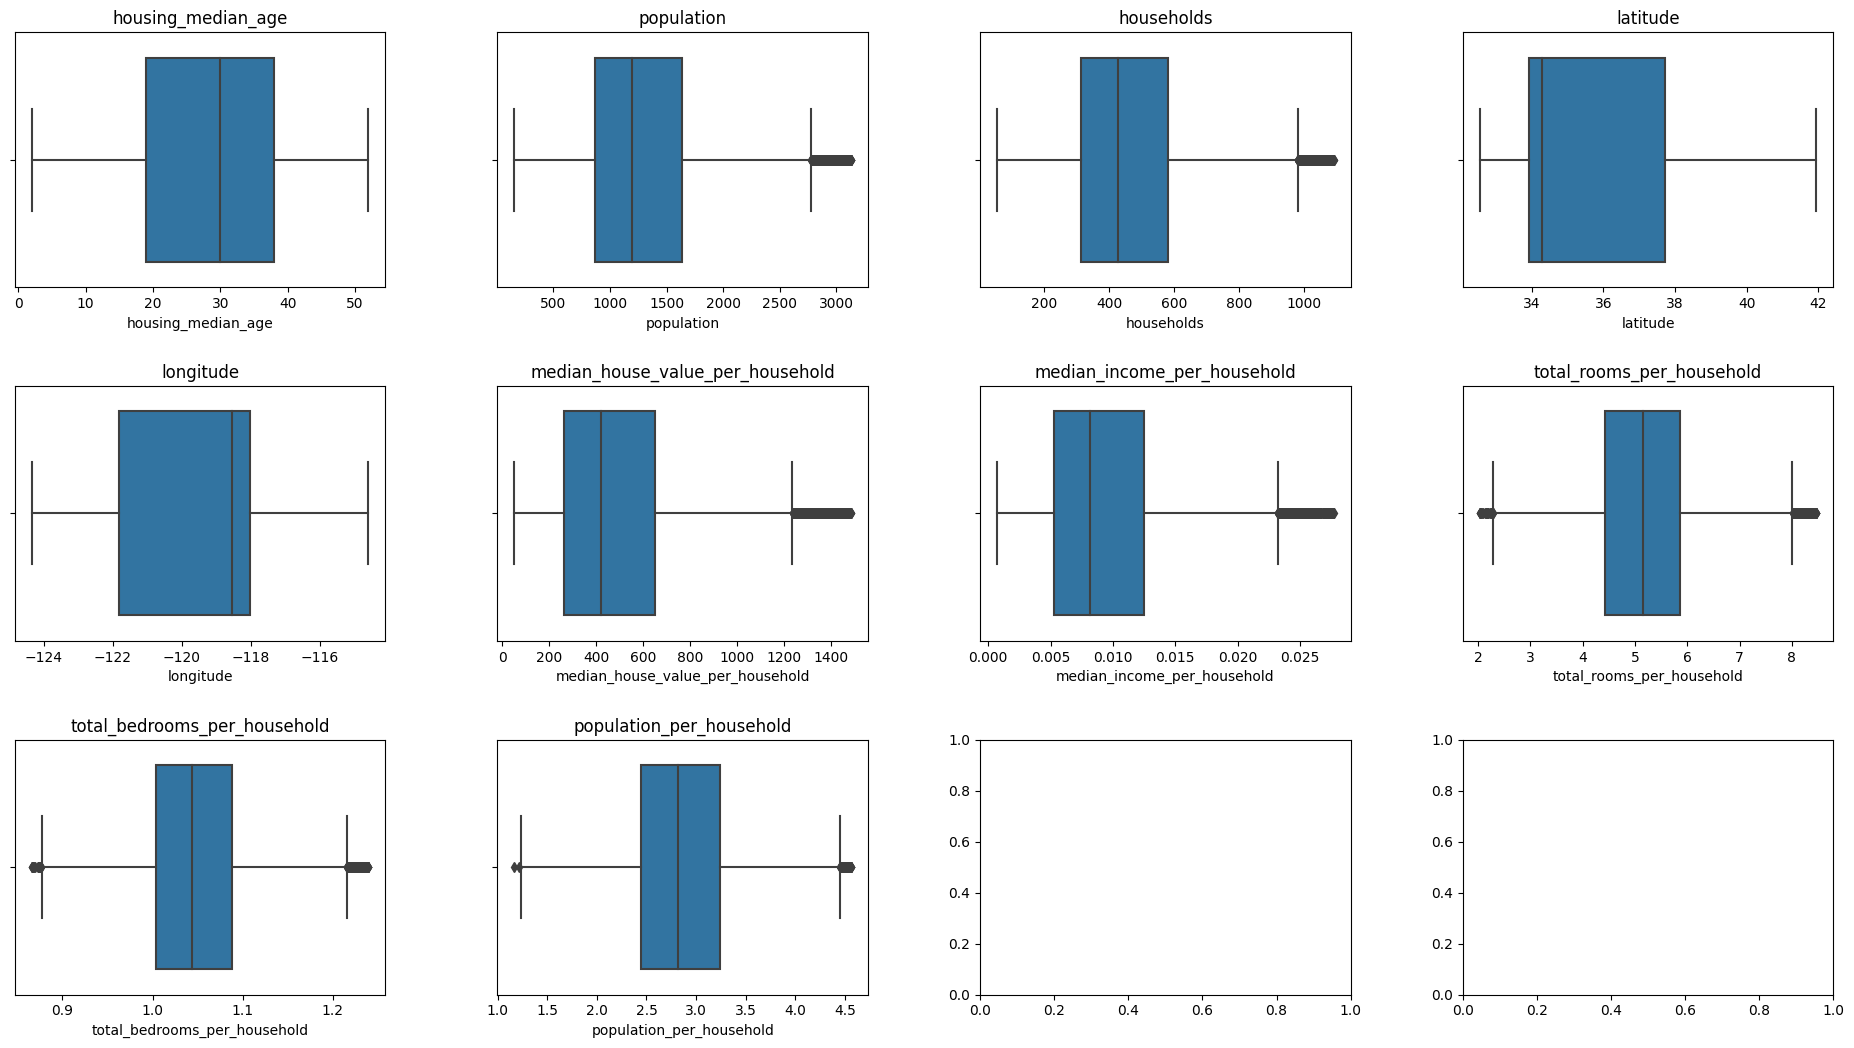

In [153]:
# Plotting box plots of the dataset to visually show the updated state of
# the dataset
plot_distributions(normalizedHousesClean, normalizedHousesClean.columns)

#### Rationale for Method for Outlier Detection

I decided to create the decision boundary for outliers based upon a calculation of the mean as well as the inter quartile range.
> Calculation :
* Lower boundary = first quartile - (interquartile range * boundary multiplier)
* Upper boundary = third quartile + (interquartile range * boundary multiplier)
    * boundary multiplier = 1.5

My rationale for this method is as follows:
> Utilised Feature Extraction
* I only calculated the decision boundaries for features I identified as being useful for the prediction of outliers, this increases the efficiency of the outlier detection as more computations are not done needlessly.

> Robustness Against Skewed Distributions
* The interquartile range is less sensitive to extreme values than the standard deviation as it focuses on the middle 50% of the data and as such should be more robust against skewed distributions.

> Balance between Sensitivity and Generality
* The multiplier (1.5) is used as a tuning parameter to determine the sensitivity of the calculation, in this case trying to find a balance between sensitivity and generality.
    * A lower value would make the method more conservative.
    * A higher value would increase the range for potential outliers.

> Easy Communicability
* The simplicity of the method makes it easy to interpret and communicate; calculating the quartiles for the data, determining the interquartile range and then applying a straightforward multiplier to set the outlier decision boundaries.

> Preserving a Significant Portion of the Data
* By setting the decision boundaries at (1.5) times the interquartile range, the method helps identify potential outliers while still preserving a substantial amount of the data (~76%). Therefore helping to distinguish extreme values without overly excluding legitimate datapoints.

> Using a Widely Adopted Standard (Turkey Fences)
* I have used a standard method in non-algorithmic data analysis, recognized for its simplicity and effectiveness. Similarly with my choice of (1.5) for the boundary multiplier.
    * Reference : [IBM : Global AI and Data Science](https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder#:~:text=It%20is%20calculated%20by%20creating,that%20is%20"far%20out".)

### Algorithmic Outlier Detection

#### Local Outlier Factor (LOF)

##### Calculation of Outliers

In [154]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor

# Create the classifier
clf = LocalOutlierFactor(n_neighbors = 20)

# Select features for LOF
features = [
    "population",
    "households",
    "median_house_value_per_household",
    "median_income_per_household",
    "total_rooms_per_household",
    "total_bedrooms_per_household",
    "population_per_household"
    ]
featureExtractedDataset = normalizedHouses[features]

# Use the classifier on the dataset
clf.fit_predict(featureExtractedDataset)
# Calculate LOF scores for the records
lofClassification = clf.negative_outlier_factor_.tolist()

# Create a copy of the normalizedHouses dataset before adding the additional column
normalizedHousesLOF = normalizedHouses.copy()

# Add an additional column to the dataset to indicate whether LOF determines
# the record to be a outlier or an inlier
# Inlier > -1
# Outlier =< -1
normalizedHousesLOF["LOF"] = lofClassification

# Numerically describe the dataset to check the column has been added correctly
normalizedHousesLOF.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household,LOF
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,499.539680,35.631861,-119.569704,809.734297,0.015870,5.429000,1.096675,3.070655,-1.046981
std,12.585558,1132.462122,382.329753,2.135952,2.003532,4451.787312,0.119325,2.474173,0.473911,10.386050,0.213390
min,1.000000,3.000000,1.000000,32.540000,-124.350000,10.014154,0.000380,0.846154,0.333333,0.692308,-19.312270
25%,18.000000,787.000000,280.000000,33.930000,-121.800000,250.901889,0.005042,4.440716,1.006079,2.429741,-1.052155
50%,29.000000,1166.000000,409.000000,34.260000,-118.490000,431.332563,0.008447,5.229129,1.048780,2.818116,-1.014336
75%,37.000000,1725.000000,605.000000,37.710000,-118.010000,744.739846,0.014111,6.052381,1.099526,3.282261,-0.995159
max,52.000000,35682.000000,6082.000000,41.950000,-114.310000,500001.000000,15.000100,141.909091,34.066667,1243.333333,-0.951252


##### Removal of Outliers from Dataset

In [155]:
# Create a copy of the normalized dataset with the LOF column which only
# includes the data which has an LOF score between -1 and -0.9 (I.e. very likely
# to be an inlier)
normalizedHousesLOFClean = normalizedHousesLOF.query(
    "-1 < LOF < -0.9"
)

##### Reporting of Indexes of Outliers

In [156]:
# Finding the outliers by finding which records from the houses dataframe
# are not present in the normalizedHousesLOFClean dataframe
lofOutliers = houses[~houses.index.isin(normalizedHousesLOFClean.index)]

# Creating a variable to hold the index values for the outlier records
indexesOfLofOutliers = lofOutliers.index

# Reporting the indexes of the outliers
print(indexesOfLofOutliers)

Int64Index([    0,     1,     2,     5,     6,     7,     8,     9,    10,
               11,
            ...
            20615, 20617, 20620, 20621, 20622, 20626, 20628, 20629, 20638,
            20639],
           dtype='int64', length=14027)


##### Numerical and Visual Description of the Cleaned Normalized Dataset

In [157]:
# Numerically describing the dataset to show the updated state of the dataset
normalizedHousesLOFClean.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household,LOF
count,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000
mean,28.803418,1338.629518,454.945864,35.727809,-119.592462,679.473163,0.014060,5.584721,1.093375,2.907369,-0.987330
std,12.257795,950.201230,306.391390,2.182295,1.992754,872.966769,0.025688,2.096703,0.364184,0.472928,0.008827
min,1.000000,18.000000,7.000000,32.560000,-124.350000,23.241271,0.000892,1.130435,0.571429,1.060606,-0.999997
25%,19.000000,737.000000,271.000000,33.950000,-121.720000,247.180667,0.005500,4.682997,1.000000,2.611111,-0.994529
50%,30.000000,1109.000000,382.000000,34.280000,-118.510000,431.818182,0.009468,5.429245,1.043290,2.849802,-0.988781
75%,37.000000,1658.000000,553.000000,37.760000,-118.020000,772.314050,0.015660,6.134021,1.094118,3.108527,-0.981581
max,52.000000,7363.000000,2463.000000,41.920000,-114.470000,9942.222222,1.082171,61.812500,11.000000,10.153846,-0.951252


plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household', 'LOF']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]
column LOF
plotting on axes [2,2]


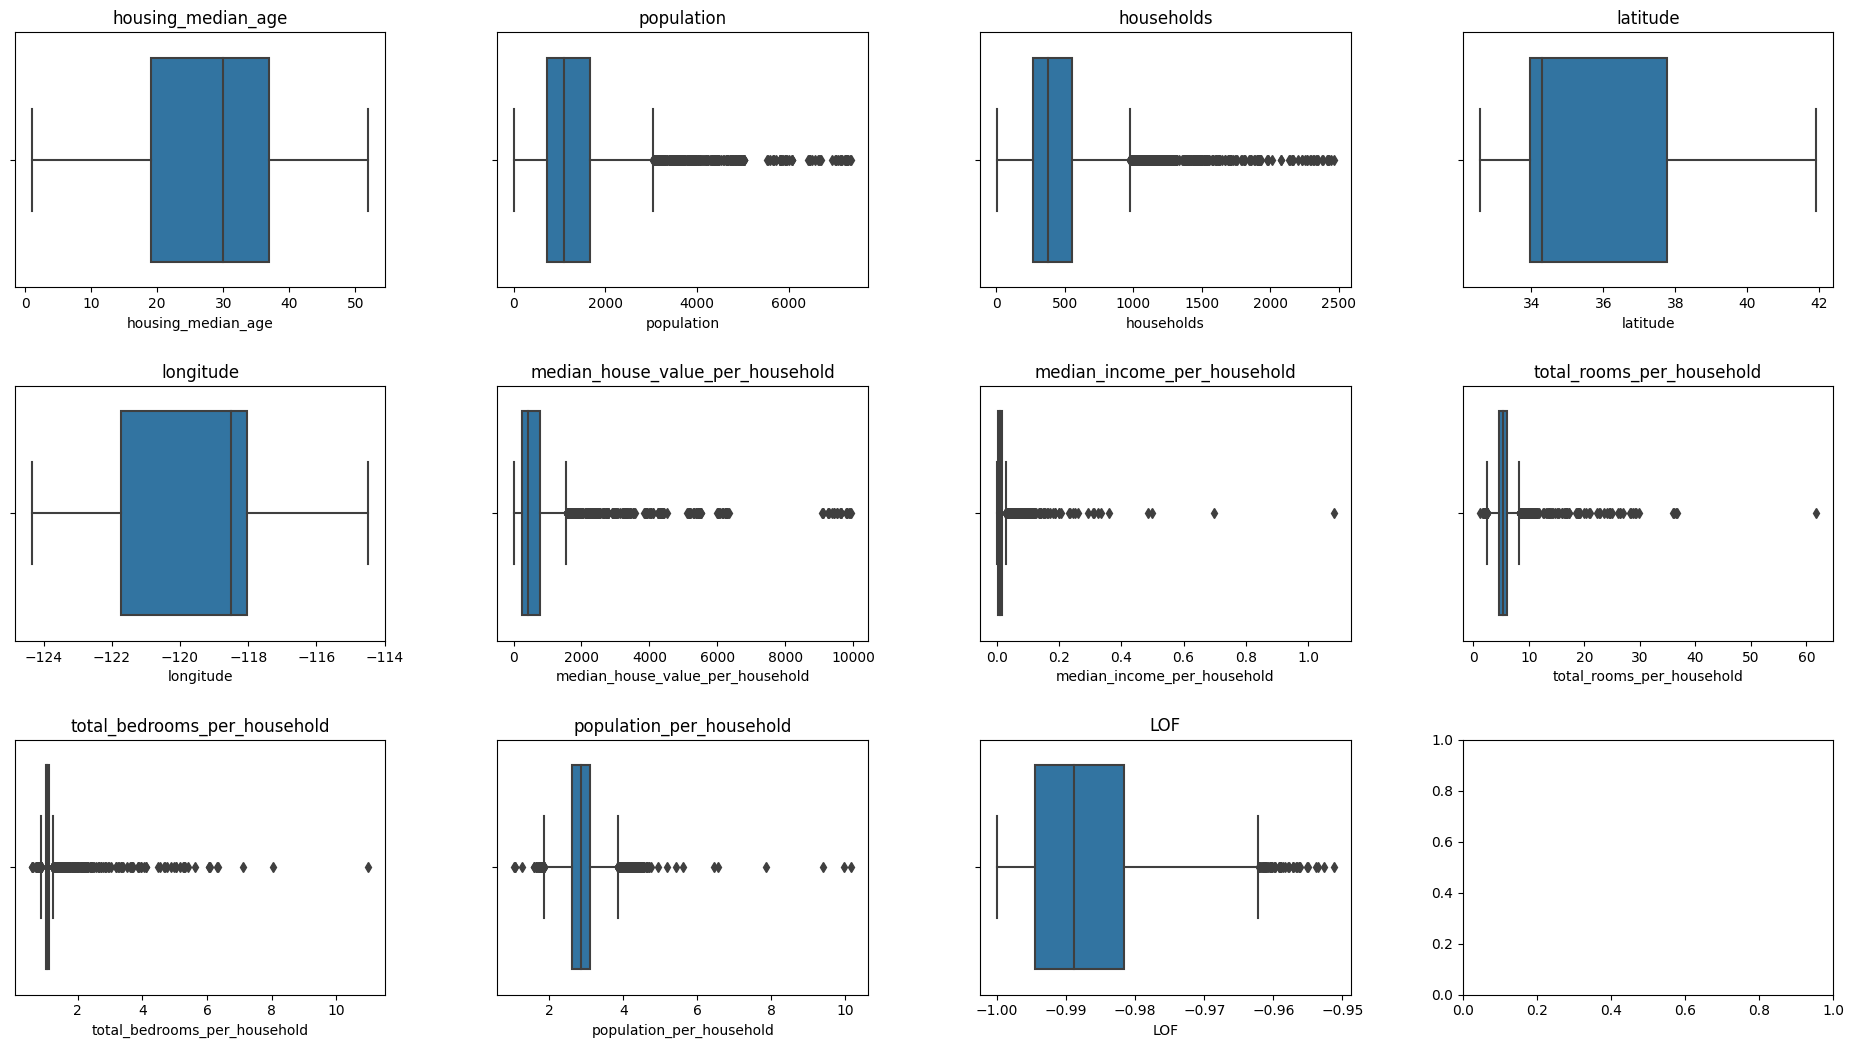

In [158]:
# Plotting box plots of the dataset to visually show the updated state of
# the dataset
plot_distributions(normalizedHousesLOFClean, normalizedHousesLOFClean.columns)

##### Comparison of Results with Non-Algorithmic Outlier Detection

###### Indexes Removed

In [159]:
# Looking at the indexes that both the non-algorithmic method and the LOF method
# removed
nonAlgorithmicLofCommonIndexes = indexesOfNonAlgorithmicOutliers[indexesOfNonAlgorithmicOutliers.isin(indexesOfLofOutliers)]

print(nonAlgorithmicLofCommonIndexes)
print(f"\nThe number of common indexes removed was {len(nonAlgorithmicLofCommonIndexes)}.\n")

# Amount of indexes removed by each method
print(f"Non-Algorithmic method removed : {len(indexesOfNonAlgorithmicOutliers)} indexes.")
print(f"LOF method removed : {len(indexesOfLofOutliers)} indexes.")

Int64Index([    0,     1,     2,    41,    57,    59,    61,    62,    63,
               67,
            ...
            20575, 20578, 20583, 20601, 20604, 20608, 20617, 20620, 20621,
            20629],
           dtype='int64', length=3614)

The number of common indexes removed was 3614.

Non-Algorithmic method removed : 4977 indexes.
LOF method removed : 14027 indexes.


###### Boxplots of Features

plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]
plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_hou

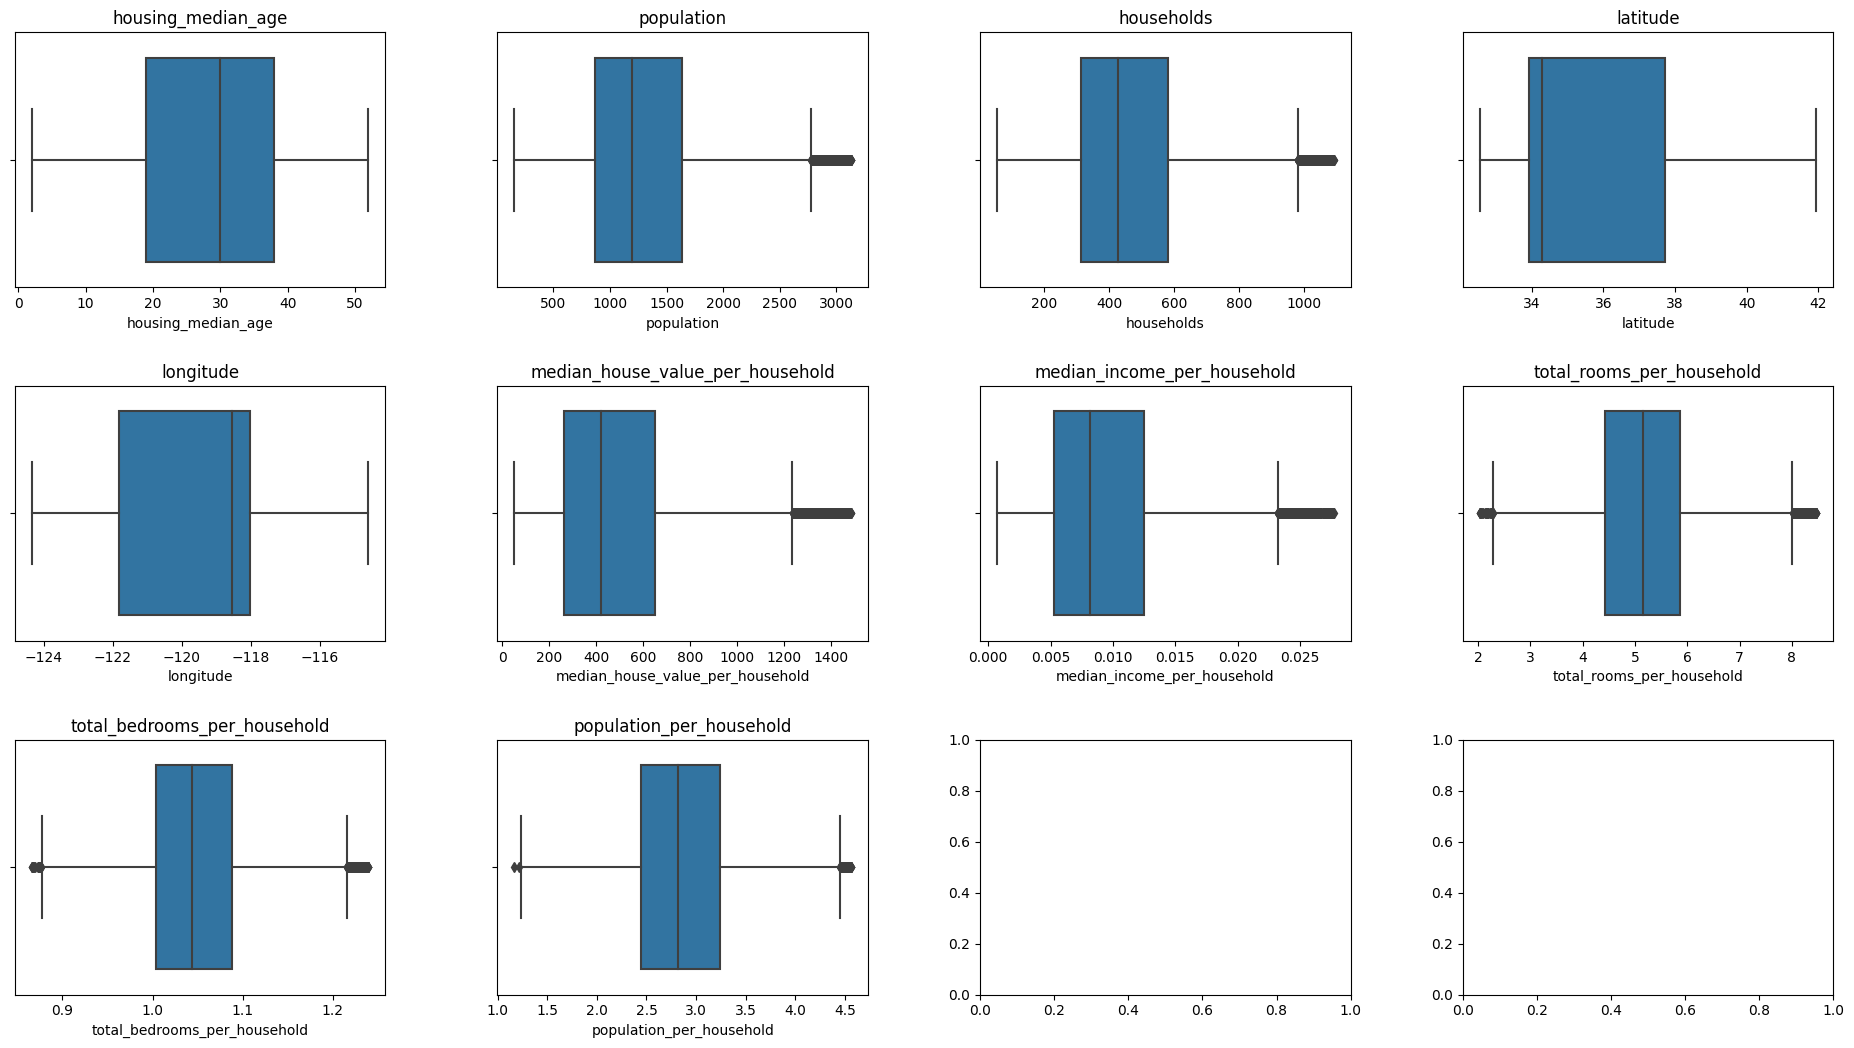

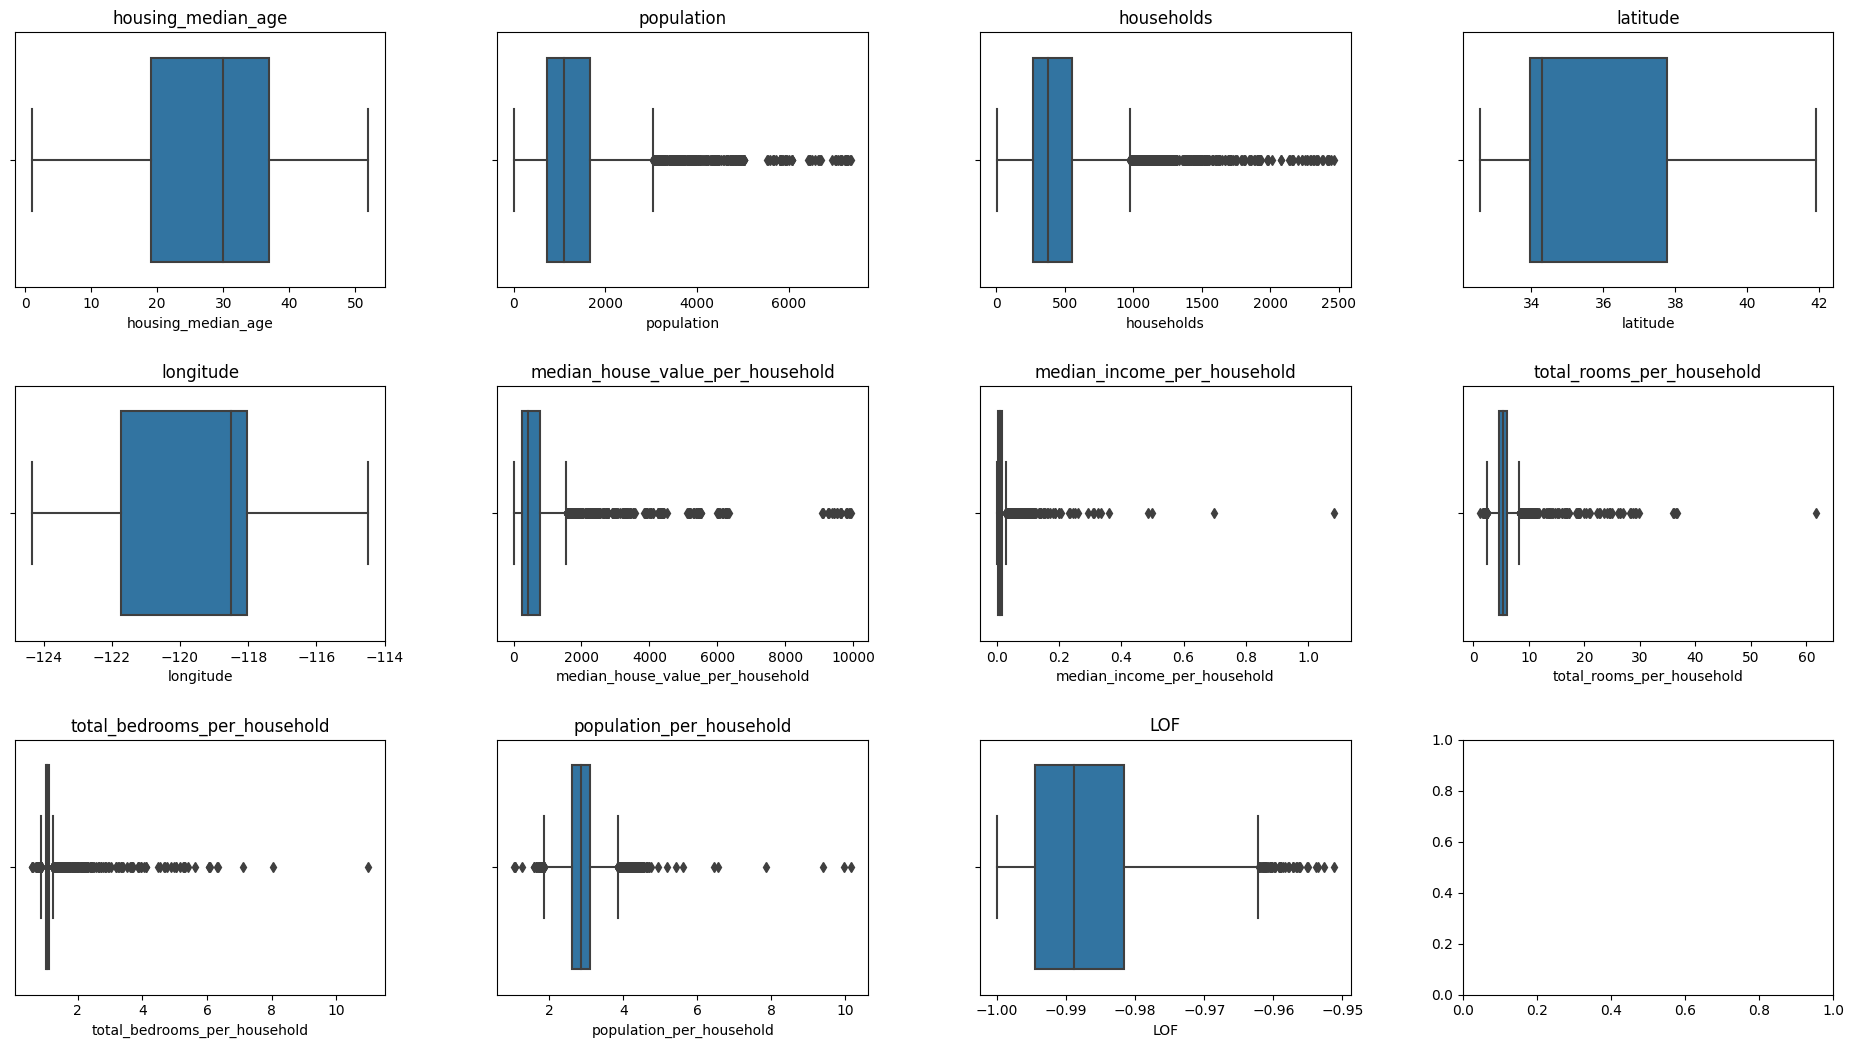

In [160]:
# Box plots for non-algorithmic method and LOF
plot_distributions(normalizedHousesClean, normalizedHousesClean.columns)
plot_distributions(normalizedHousesLOFClean, normalizedHousesLOFClean.columns)

###### Density Graph for Population

<Axes: xlabel='population', ylabel='Density'>

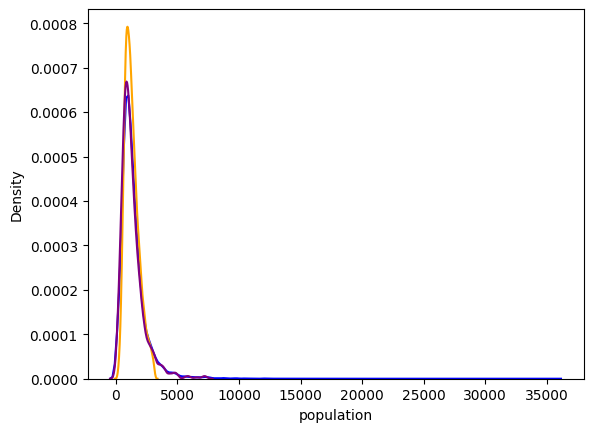

In [161]:
# Plotting a density graph to see the variation in density of the population
# data between the raw dataset, non-algorithmicly cleaned dataset, and the LOF
# cleaned dataset

# Raw dataset = Blue
# Non-Algorithmicaly cleaned dataset = Orange
# LOF cleaned dataset = Purple
sns.kdeplot(houses["population"], color = "blue")
sns.kdeplot(normalizedHousesClean["population"], color = "orange")
sns.kdeplot(normalizedHousesLOFClean["population"], color = "purple")

##### Comments on LOF vs Non-Algorithmic Outlier Detection Methods

The LOF method removed just under 3 times more indexes than the non-algorithmic method.
* Of the 4977 indexes the non-algorithmic method removed 3,614 were also removed by the LOF method, therefore indicating a significant portion of the indexes removed by the non-algorithmic method are supported by LOF.
* Given the fewer datapoints left in the LOF dataset, it would be harder to use than the non-algorithmic dataset for any potential future models as there would be less data for training.
   * Potentially leading to an overfitted model.

Looking at the box plots of the two cleaned datasets:
* The LOF dataset looks to have a greater variance in the data which could lead to a model with greater generalizability.
* Conversely the non-algorithmic dataset would potentially lead to a model that is more stable with more reliable analyses.

Looking at the density graph I created for the population data:
* The non-algorithmically cleaned dataset has greater data density which would be more beneficial for any future potential models as this would lead to a better model.

The best way to compare the results would be to use them as training data for a model and to then look at its accuracy and F1 scores for some validation data.

#### KNN Global Anomaly Detection

##### Calculation of Outliers

In [162]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
# Documentation also from https://www.kaggle.com/code/kimchanyoung/simple-anomaly-detection-using-unsupervised-knn
from sklearn.neighbors import NearestNeighbors

# Select features for KNN
features = [
    "population",
    "households",
    "median_house_value_per_household",
    "median_income_per_household",
    "total_rooms_per_household",
    "total_bedrooms_per_household",
    "population_per_household"
    ]
featureExtractedDataset = normalizedHouses[features]

# Create the model
neighbours = NearestNeighbors(n_neighbors = 11)

# Fit the model to the dataset
neighbours.fit(featureExtractedDataset)

# Find the distance data
distances = neighbours.kneighbors(featureExtractedDataset)[0]
# Create a pandas dataframe with the distance data
distances = pd.DataFrame(distances)
distancesMean = distances.mean(axis = 1)


# Calculate Decision Boundary for distance
# Boundary multiplier
knnDistanceBoundaryMultiplier = 1.5

# Calculate important statistical values for the dataset
knnDistanceThirdQuartile = distancesMean.quantile(0.75)
knnDistanceFirstQuartile = distancesMean.quantile(0.25)

knnDistanceInterQuartileRange =  knnDistanceThirdQuartile - knnDistanceFirstQuartile

# Calculate lower and upper bounds for the given column
knnDistanceLowerBoundary = knnDistanceFirstQuartile - (knnDistanceInterQuartileRange * knnDistanceBoundaryMultiplier)
knnDistanceUpperBoundary = knnDistanceThirdQuartile + (knnDistanceInterQuartileRange * knnDistanceBoundaryMultiplier)


# Create a copy of the normalizedHouses dataset before adding the additional column
normalizedHousesKNN = normalizedHouses.copy()

# Add an additional column to the dataset to indicate whether LOF determines
# the record to be a outlier or an inlier
normalizedHousesKNN["KNN"] = distancesMean

# Numerically describing the dataset to ensure the column was added correctly
normalizedHousesKNN.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household,KNN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,499.539680,35.631861,-119.569704,809.734297,0.015870,5.429000,1.096675,3.070655,78.092135
std,12.585558,1132.462122,382.329753,2.135952,2.003532,4451.787312,0.119325,2.474173,0.473911,10.386050,2603.326209
min,1.000000,3.000000,1.000000,32.540000,-124.350000,10.014154,0.000380,0.846154,0.333333,0.692308,13.829728
25%,18.000000,787.000000,280.000000,33.930000,-121.800000,250.901889,0.005042,4.440716,1.006079,2.429741,24.964546
50%,29.000000,1166.000000,409.000000,34.260000,-118.490000,431.332563,0.008447,5.229129,1.048780,2.818116,31.824224
75%,37.000000,1725.000000,605.000000,37.710000,-118.010000,744.739846,0.014111,6.052381,1.099526,3.282261,44.522432
max,52.000000,35682.000000,6082.000000,41.950000,-114.310000,500001.000000,15.000100,141.909091,34.066667,1243.333333,367766.020126


##### Removal of Outliers from Dataset

In [163]:
# Creates a dataframe only with the records that meet the criteria below
# Inlier when : Q1 - (IQR * 1.5) < KNN < Q3 + (IQR * 1.5)
normalizedHousesKNNClean = normalizedHousesKNN.query(
    f"{knnDistanceLowerBoundary} < KNN < {knnDistanceUpperBoundary}"
)

##### Reporting of Indexes of Outliers

In [164]:
# Finding the outliers by finding which records from the houses dataframe
# are not present in the normalizedHousesKNNClean dataframe
knnOutliers = houses[~houses.index.isin(normalizedHousesKNNClean.index)]

# Creating a variable to hold the index values for the outlier records
indexesOfKnnOutliers = knnOutliers.index

# Reporting the indexes of the outliers
print(indexesOfKnnOutliers)

Int64Index([    0,    73,    88,    89,    91,    92,    95,    96,    98,
              100,
            ...
            20529, 20530, 20534, 20539, 20543, 20544, 20563, 20578, 20625,
            20629],
           dtype='int64', length=1777)


##### Numerical and Visual Description of the Cleaned Normalized Dataset

In [165]:
# Numerically describing the dataset to show the updated state of the dataset
normalizedHousesKNNClean.describe()

,housing_median_age,population,households,latitude,longitude,median_house_value_per_household,median_income_per_household,total_rooms_per_household,total_bedrooms_per_household,population_per_household,KNN
count,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000,18863.000000
mean,29.177437,1282.105657,449.902879,35.651286,-119.581368,590.517405,0.011616,5.388047,1.087444,2.905815,33.783493
std,12.373720,705.052125,241.371162,2.149802,2.003618,512.100266,0.012264,1.833170,0.312853,0.687422,12.425983
min,1.000000,29.000000,8.000000,32.540000,-124.350000,50.600801,0.000703,0.888889,0.500000,1.275000,13.829728
25%,19.000000,788.000000,281.000000,33.930000,-121.790000,262.330619,0.005353,4.473427,1.004582,2.443244,24.468902
50%,30.000000,1140.000000,400.000000,34.270000,-118.500000,439.664804,0.008643,5.230769,1.047468,2.817330,30.418443
75%,37.000000,1621.000000,568.000000,37.730000,-118.010000,736.397432,0.013991,6.021641,1.097922,3.261909,40.272956
max,52.000000,5030.000000,1929.000000,41.950000,-114.310000,6252.941176,0.696561,52.848214,11.410714,9.400000,73.852353


plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household', 'KNN']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]
column KNN
plotting on axes [2,2]


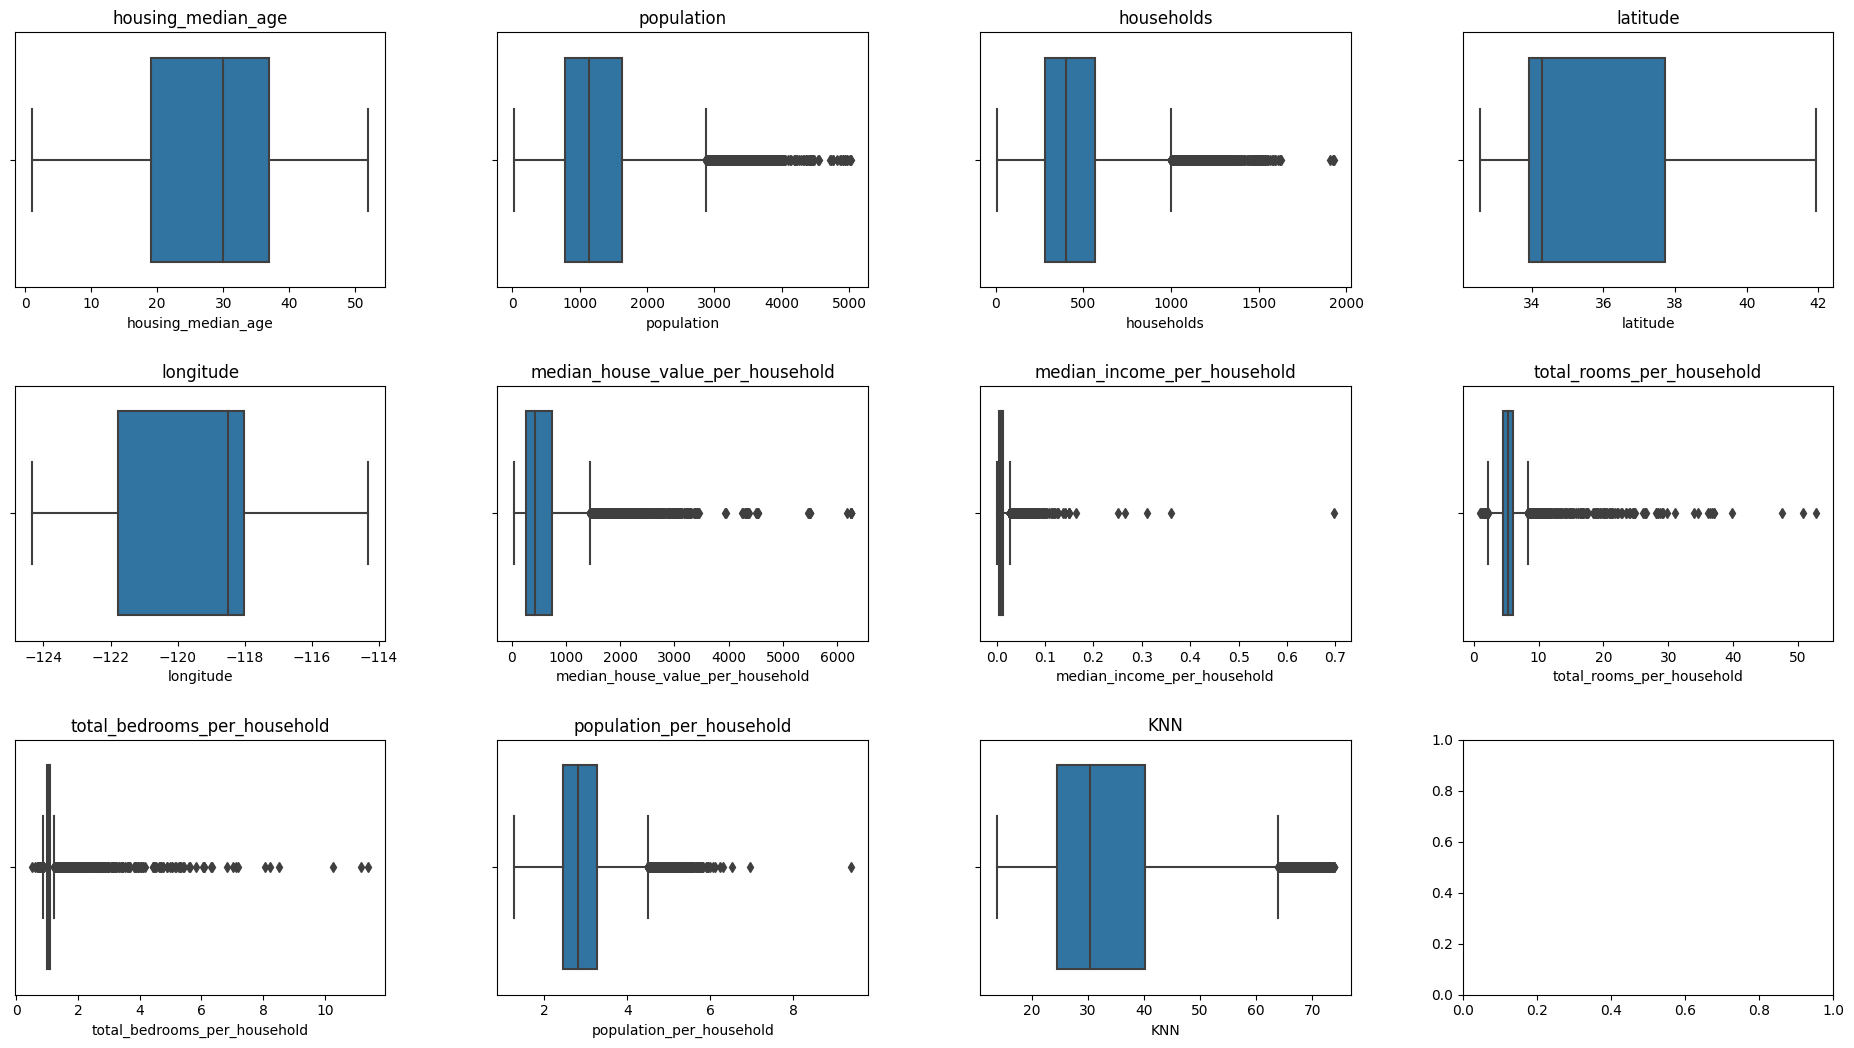

In [166]:
# Plotting box plots of the dataset to visually show the updated state of
# the dataset
plot_distributions(normalizedHousesKNNClean, normalizedHousesKNNClean.columns)

##### Comparison of Results with Non-Algorithmic Outlier Detection

###### Indexes Removed

In [167]:
# Looking at the indexes that both the non-algorithmic method and the KNN method
# removed
nonAlgorithmicKnnCommonIndexes = indexesOfNonAlgorithmicOutliers[indexesOfNonAlgorithmicOutliers.isin(indexesOfKnnOutliers)]

print(nonAlgorithmicKnnCommonIndexes)
print(f"\nThe number of common indexes removed was {len(nonAlgorithmicKnnCommonIndexes)}.\n")

# Amount of indexes removed by each method
print(f"Non-Algorithmic method removed : {len(indexesOfNonAlgorithmicOutliers)} indexes.")
print(f"KNN method removed : {len(indexesOfKnnOutliers)} indexes.")

Int64Index([    0,    73,    88,    89,    91,    92,    95,    96,    98,
              100,
            ...
            20529, 20530, 20534, 20539, 20543, 20544, 20563, 20578, 20625,
            20629],
           dtype='int64', length=1526)

The number of common indexes removed was 1526.

Non-Algorithmic method removed : 4977 indexes.
KNN method removed : 1777 indexes.


###### Boxplots of Features

plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]
plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_hou

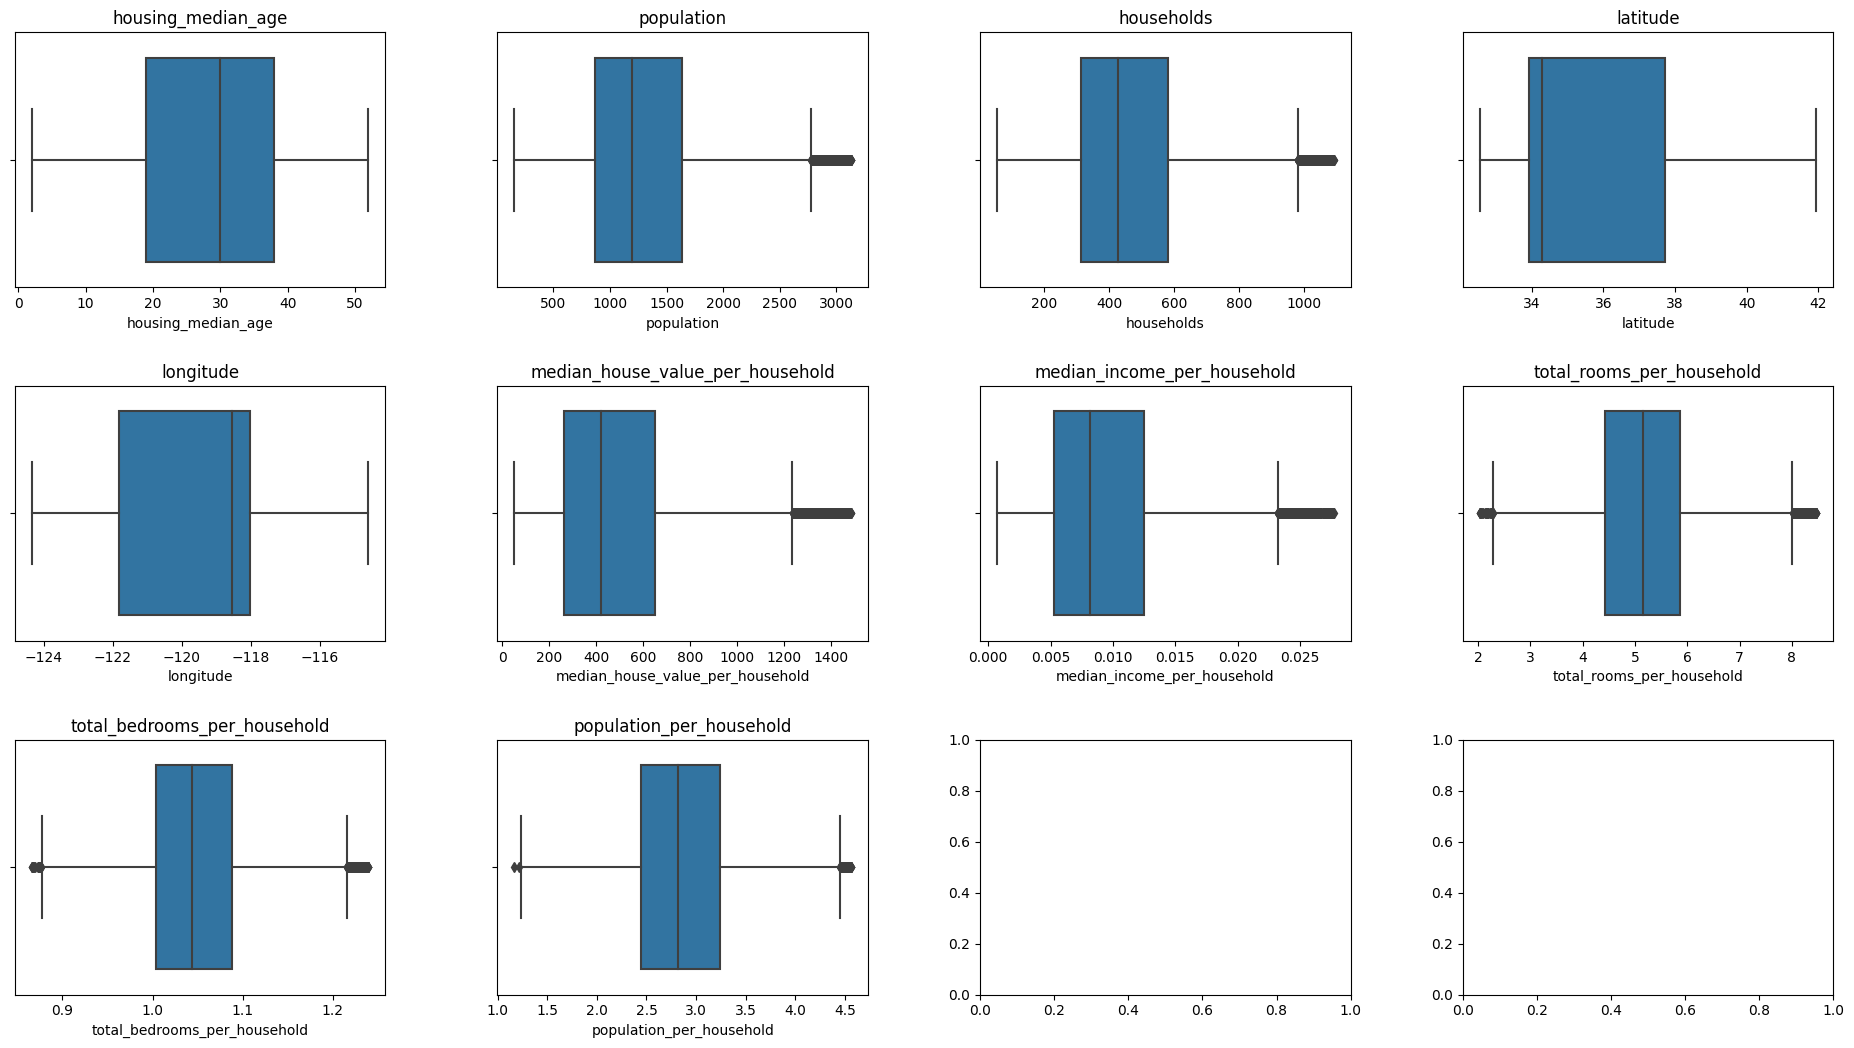

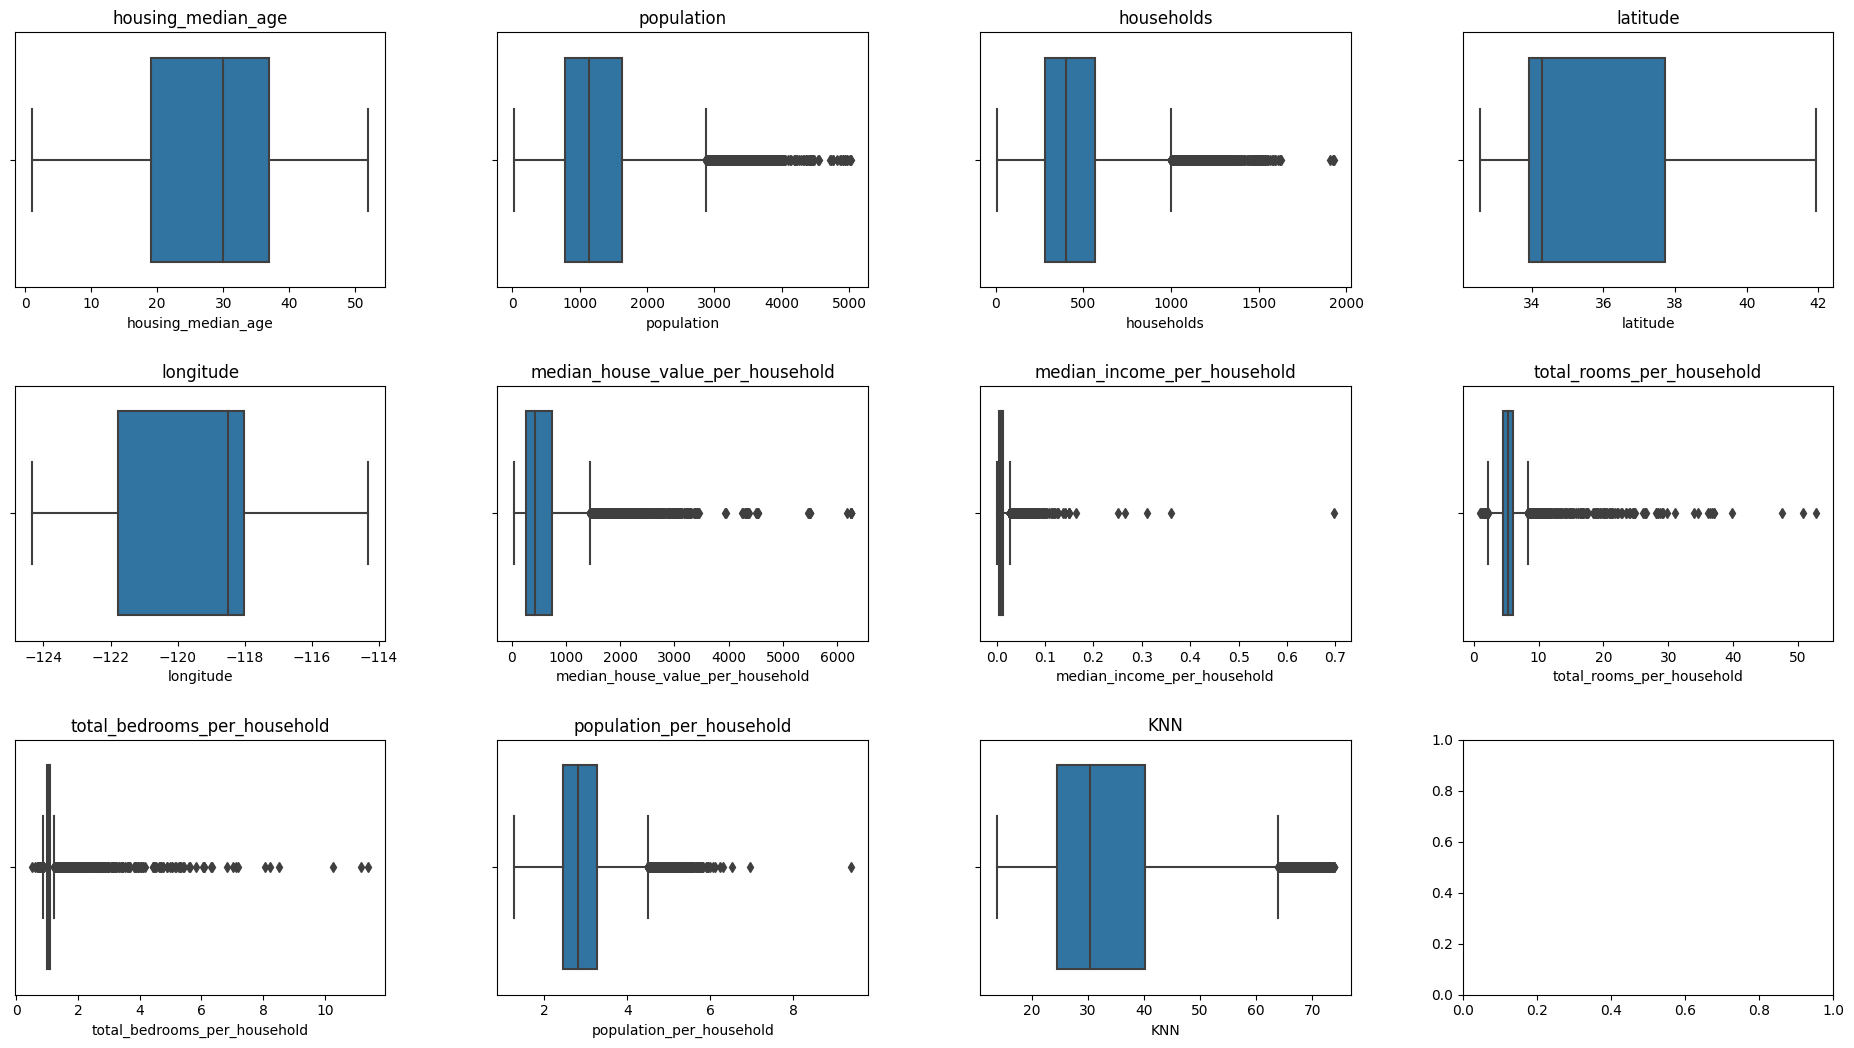

In [168]:
# Box plots for non-algorithmic method and KNN
plot_distributions(normalizedHousesClean, normalizedHousesClean.columns)
plot_distributions(normalizedHousesKNNClean, normalizedHousesKNNClean.columns)

###### Density Graph for Population

<Axes: xlabel='population', ylabel='Density'>

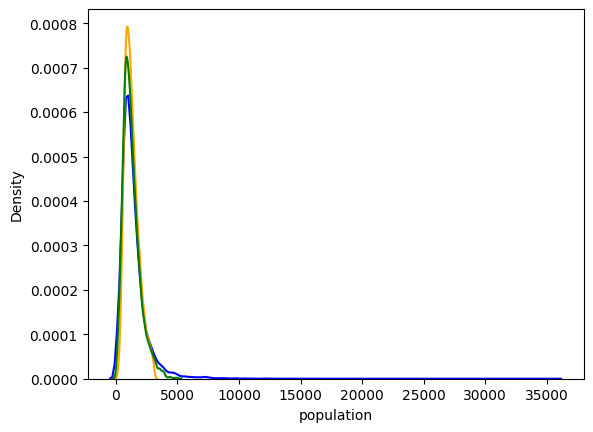

In [169]:
# Plotting a density graph to see the variation in density of the population
# data between the raw dataset, non-algorithmicly cleaned dataset, and the KNN
# cleaned dataset

# Raw dataset = Blue
# Non-Algorithmicaly cleaned dataset = Orange
# KNN cleaned dataset = Green
sns.kdeplot(houses["population"], color = "blue")
sns.kdeplot(normalizedHousesClean["population"], color = "orange")
sns.kdeplot(normalizedHousesKNNClean["population"], color = "green")

##### Comments on KNN vs Non-Algorithmic Outlier Detection Methods

The KNN method removed a little under half of the number of indexes that the non-algorithmic method did.
* Of the 4977 indexes the non-algorithmic method removed 1526 were also removed by the KNN method, therefore indicating a substantial portion of the indexes removed by the non-algorithmic method are supported by the KNN method.
* Given the greater amount of datapoints left in the KNN dataset, it is likely that the dataset would be good for training any potential future models.

Looking at the box plots of the two cleaned datasets:
* The KNN dataset looks to have a greater variance in the data which could lead to a model with greater generalizability.
* Again conversely the non-algorithmic dataset would potentially lead to a model that is more stable with more reliable analyses.

Looking at the density graph I created for the population data:
* The non-algorithmically cleaned dataset has greater data density which would be more beneficial for any future potential models as this would lead to a better model.

Once again the best way to compare the results would be to use them as training data for a model and to then look at its accuracy and F1 scores for some validation data.

#### Comparison of Results between Algorithmic vs Non-Algorithmic Methods of Outlier Detection

##### Indexes Removed

In [170]:
# Looking at the indexes that both the non-algorithmic method, the LOF method
# and the KNN method removed
nonAlgorithmicLofKnnCommonIndexes = nonAlgorithmicLofCommonIndexes.intersection(nonAlgorithmicKnnCommonIndexes)

print(f"Common Indexes from Non-Algorithmic and LOF : \n{nonAlgorithmicLofCommonIndexes}")
print(f"\nCommon Indexes from Non-Algorithmic and KNN : \n{nonAlgorithmicKnnCommonIndexes}")
print(f"\nCommon Indexes from all 3 methods : \n{nonAlgorithmicLofKnnCommonIndexes}")
print(f"\nThe number of common indexes removed was {len(nonAlgorithmicLofKnnCommonIndexes)}.\n")

# Amount of indexes removed by each method
print(f"Non-Algorithmic method removed : {len(indexesOfNonAlgorithmicOutliers)} indexes.")
print(f"LOF method removed : {len(indexesOfLofOutliers)} indexes.")
print(f"KNN method removed : {len(indexesOfKnnOutliers)} indexes.")

Common Indexes from Non-Algorithmic and LOF : 
Int64Index([    0,     1,     2,    41,    57,    59,    61,    62,    63,
               67,
            ...
            20575, 20578, 20583, 20601, 20604, 20608, 20617, 20620, 20621,
            20629],
           dtype='int64', length=3614)

Common Indexes from Non-Algorithmic and KNN : 
Int64Index([    0,    73,    88,    89,    91,    92,    95,    96,    98,
              100,
            ...
            20529, 20530, 20534, 20539, 20543, 20544, 20563, 20578, 20625,
            20629],
           dtype='int64', length=1526)

Common Indexes from all 3 methods : 
Int64Index([    0,    88,    89,    91,    92,    95,    96,    98,   100,
              101,
            ...
            20507, 20527, 20529, 20530, 20534, 20543, 20544, 20563, 20578,
            20629],
           dtype='int64', length=1335)

The number of common indexes removed was 1335.

Non-Algorithmic method removed : 4977 indexes.
LOF method removed : 14027 indexes.
KNN

##### Boxplots of Features

plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_household', 'median_income_per_household', 'total_rooms_per_household', 'total_bedrooms_per_household', 'population_per_household']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column housing_median_age
plotting on axes [0,0]
column population
plotting on axes [0,1]
column households
plotting on axes [0,2]
column latitude
plotting on axes [0,3]
column longitude
plotting on axes [1,0]
column median_house_value_per_household
plotting on axes [1,1]
column median_income_per_household
plotting on axes [1,2]
column total_rooms_per_household
plotting on axes [1,3]
column total_bedrooms_per_household
plotting on axes [2,0]
column population_per_household
plotting on axes [2,1]
plotting columns ['housing_median_age', 'population', 'households', 'latitude', 'longitude', 'median_house_value_per_hou

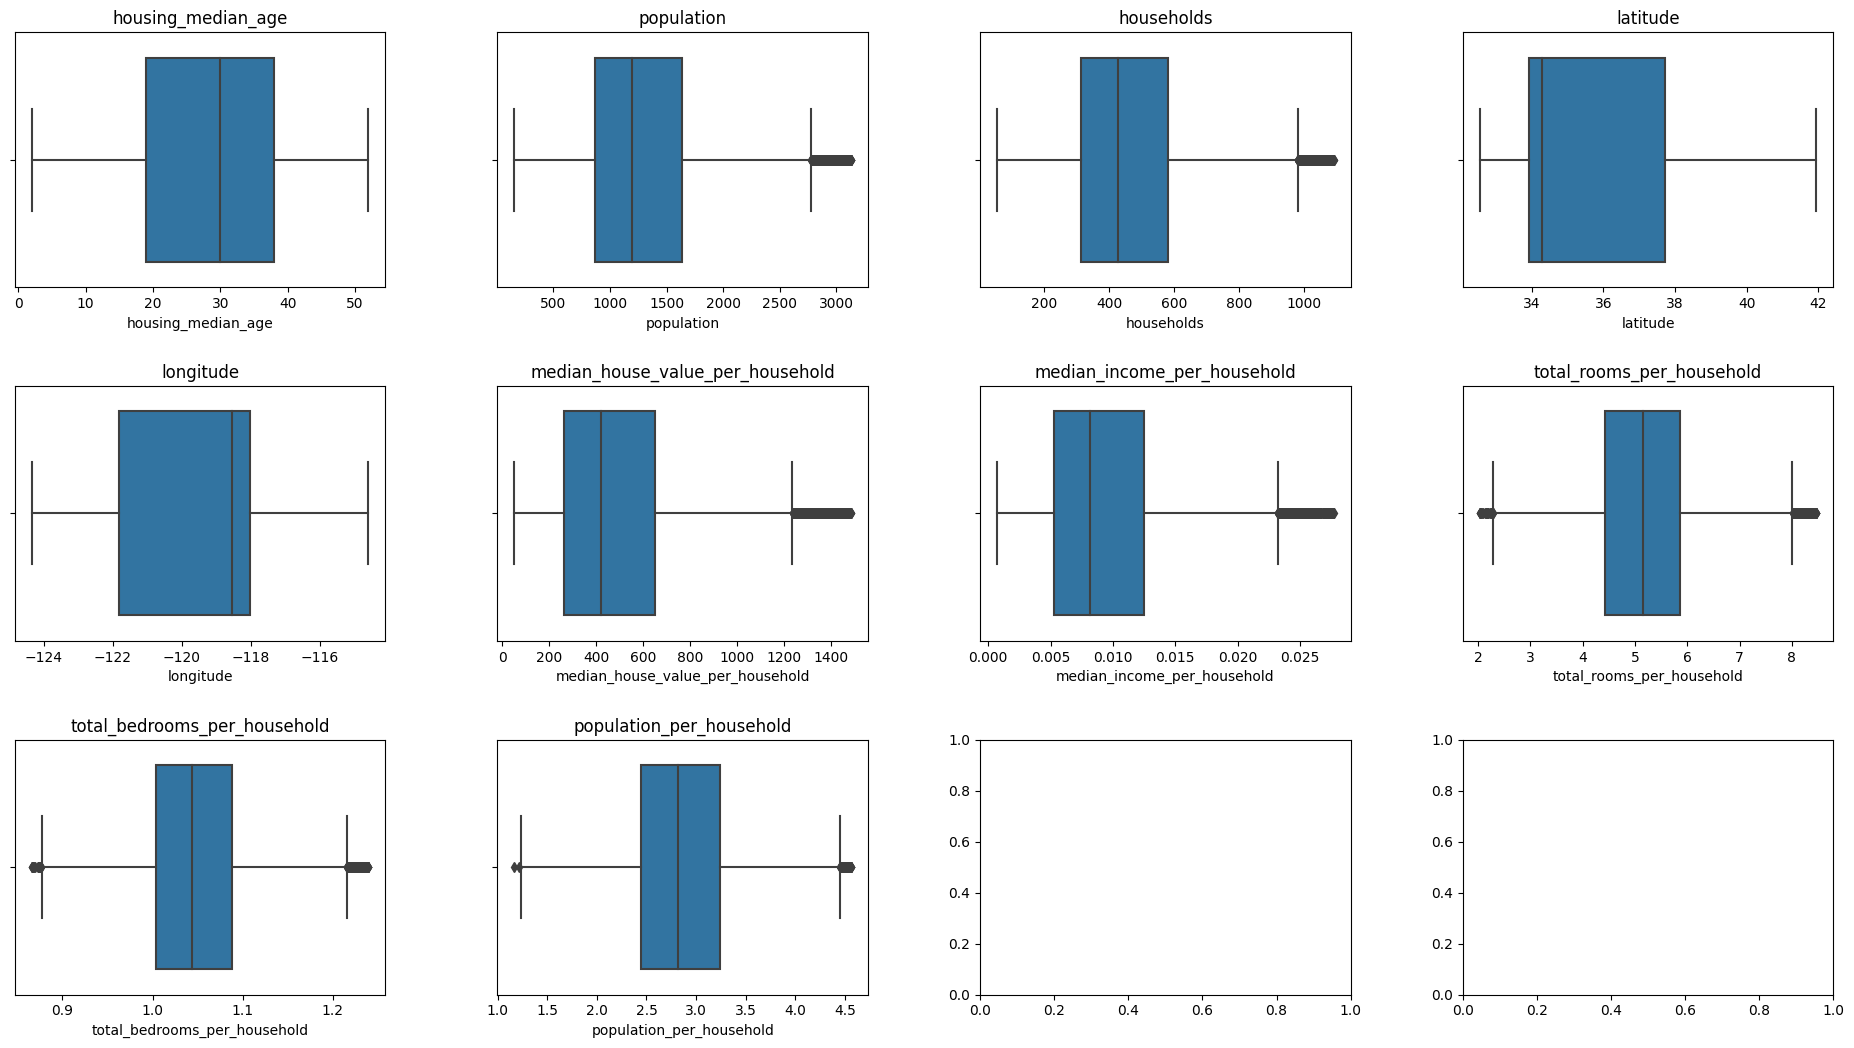

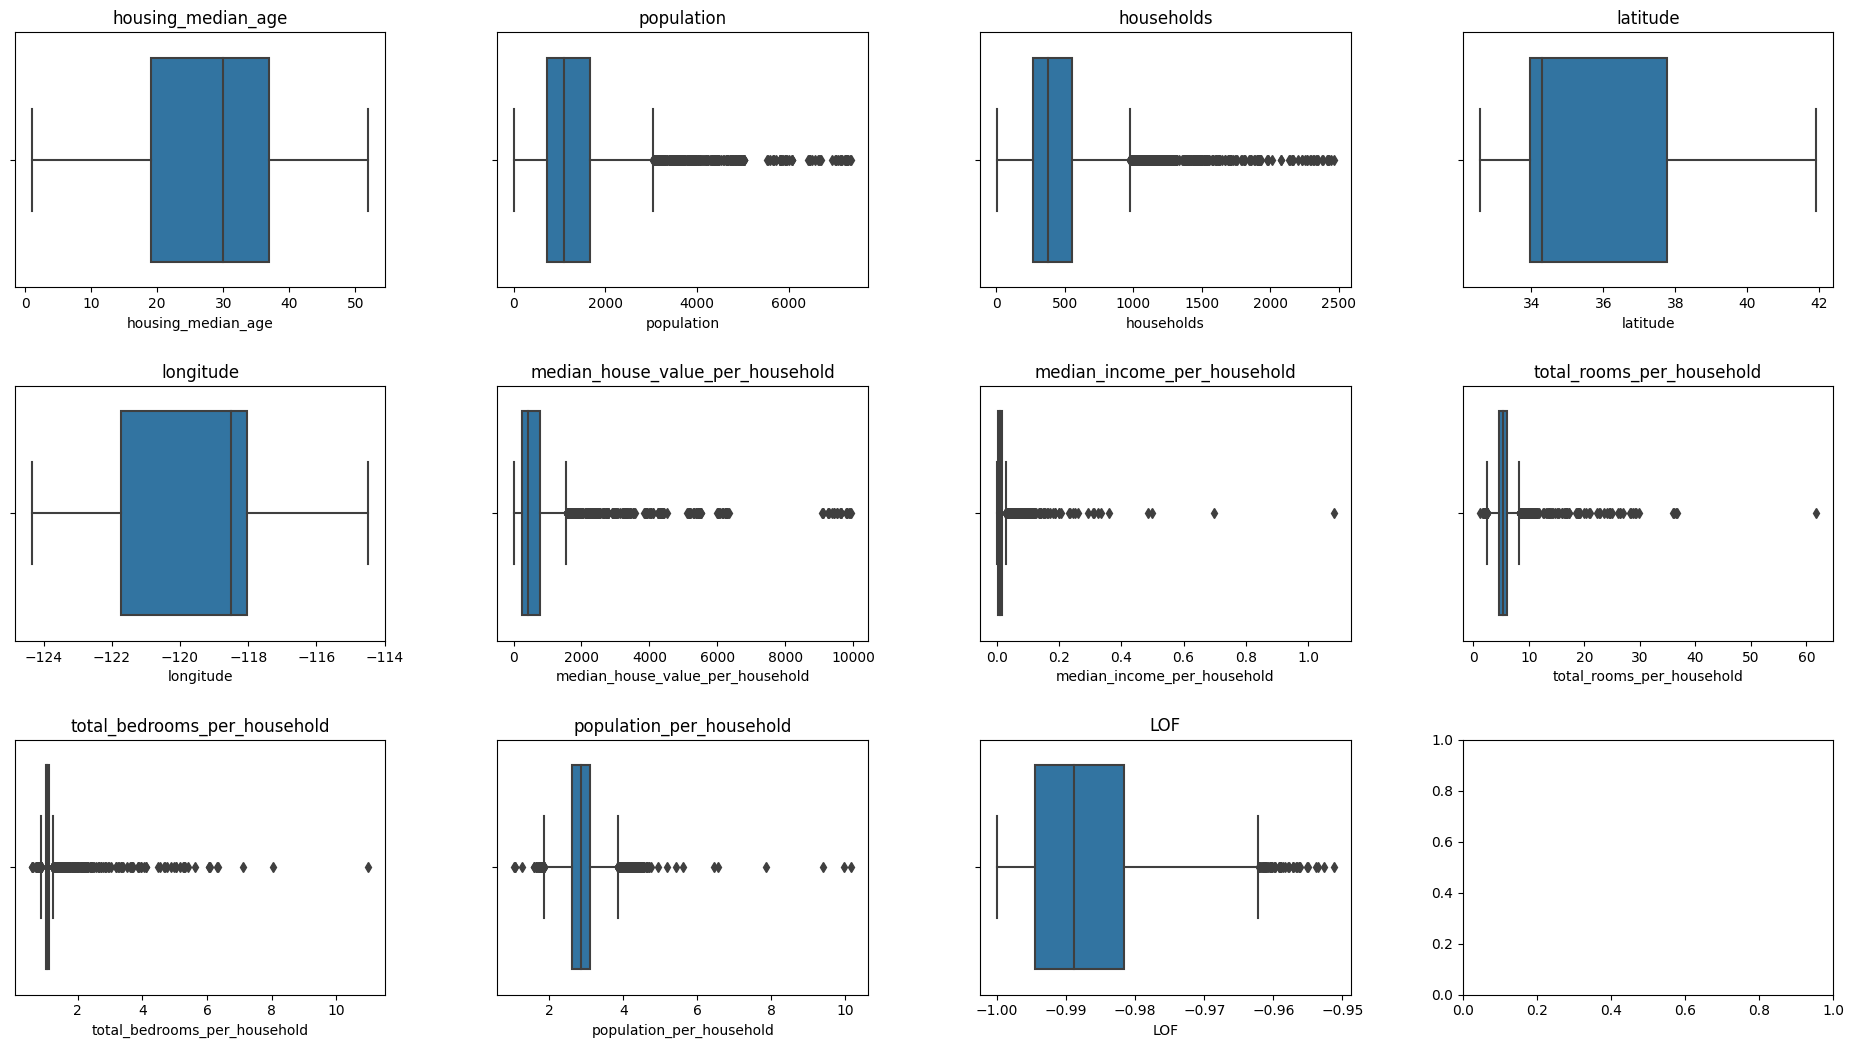

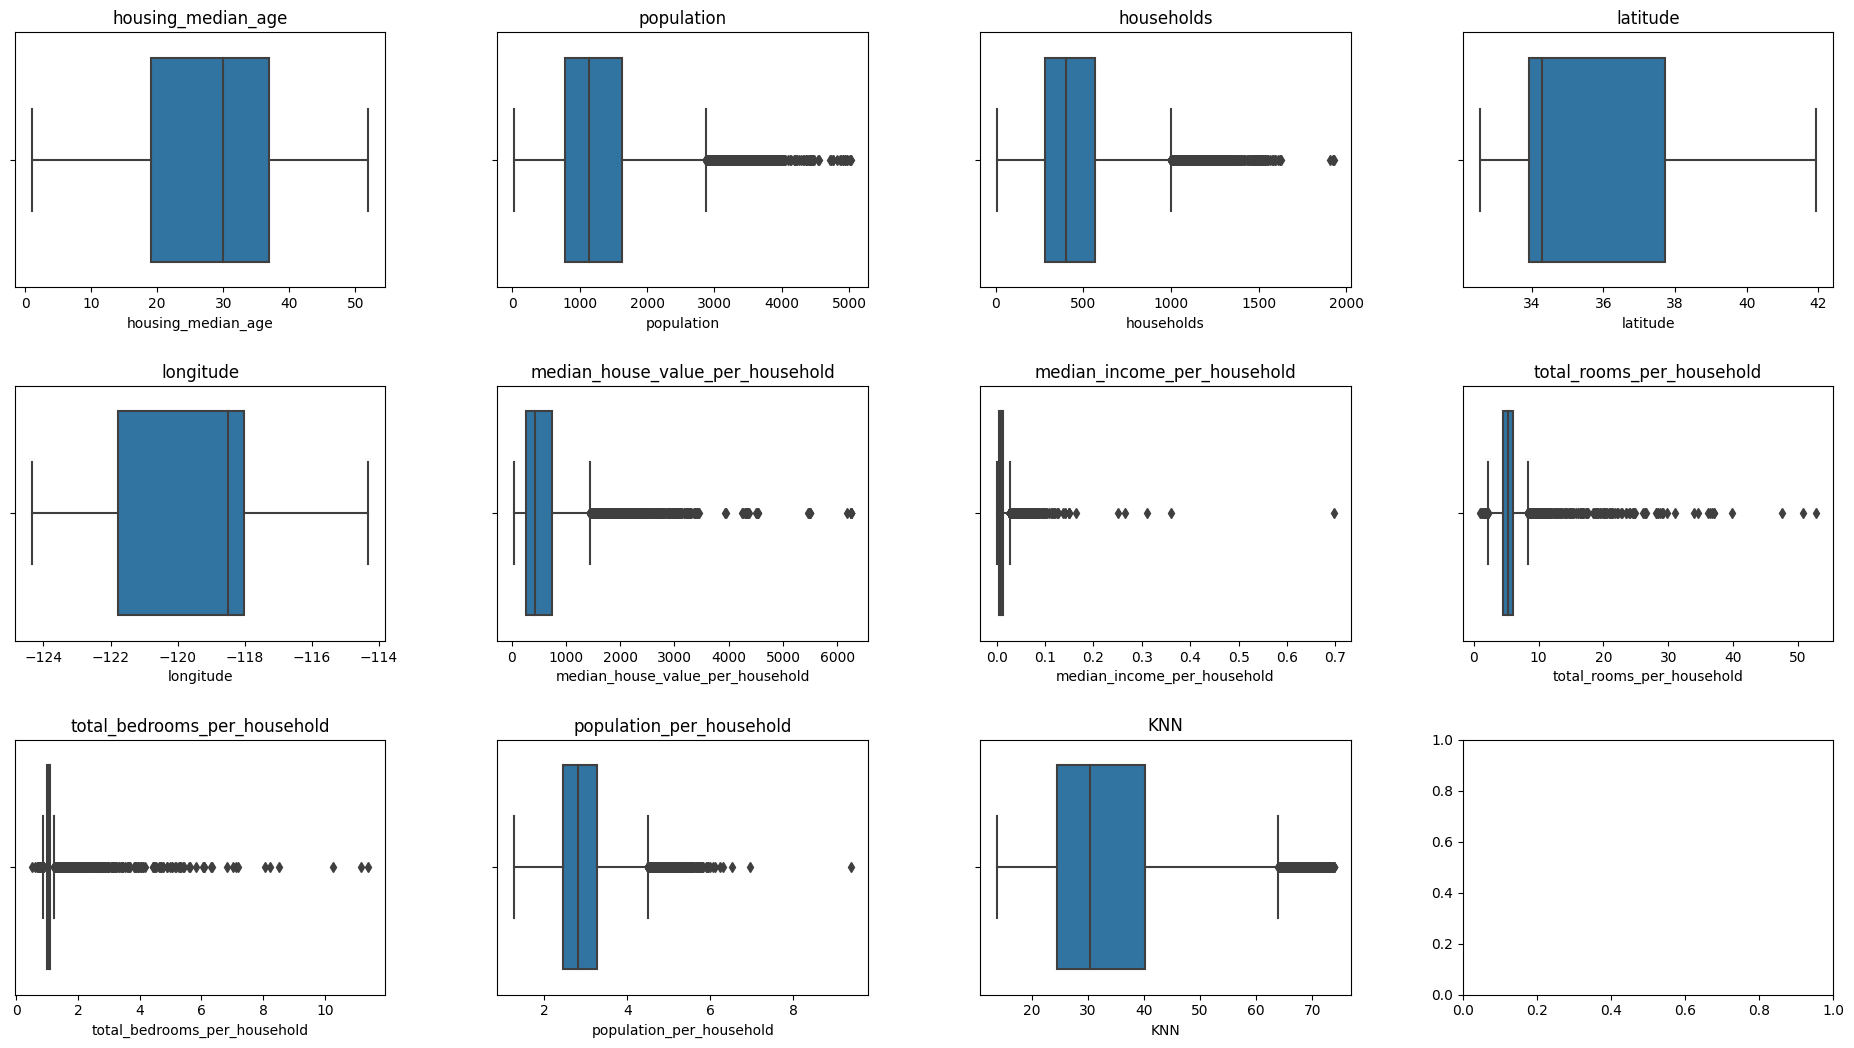

In [171]:
# Box plots for non-algorithmic method, LOF and KNN
plot_distributions(normalizedHousesClean, normalizedHousesClean.columns)
plot_distributions(normalizedHousesLOFClean, normalizedHousesLOFClean.columns)
plot_distributions(normalizedHousesKNNClean, normalizedHousesKNNClean.columns)

##### Density Graph for Population

<Axes: xlabel='population', ylabel='Density'>

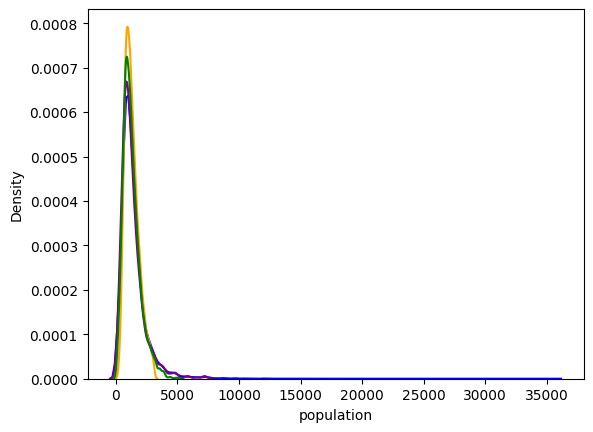

In [172]:
# Plotting a density graph to see the variation in density of the population
# data between the raw dataset, non-algorithmicly cleaned dataset, the LOF cleaned dataset
# and the KNN cleaned dataset

# Raw dataset = Blue
# Non-Algorithmicaly cleaned dataset = Orange
# LOF cleaned dataset = Purple
# KNN cleaned dataset = Green
sns.kdeplot(houses["population"], color = "blue")
sns.kdeplot(normalizedHousesClean["population"], color = "orange")
sns.kdeplot(normalizedHousesLOFClean["population"], color = "purple")
sns.kdeplot(normalizedHousesKNNClean["population"], color = "green")

#### Overall Comments on Algorithmic vs Non-Algorithmic Methods of Outlier Detection

Often a combination of both algorithmic and non-algorithmic methods are used to leverage the strengths of each and compensate for their respective limitations.

> Benefits of Algorithmic Outlier Detection Methods
* Scalability - Algorithmic methods are often scalable therefore making them suitable for handling big data scenarios where manual inspection may be impactical.
* Automation - Often algorithmic methods can be automated, reducing the need for human intervention which would be especially valuable when dealing with large quantities of data being added to a dataset.
* Flexibility - Algorithmic methods are generally flexible to different data types and distributions, therefore leading to less fine-tuning needed by the developer.

> Detriments of Algorithmic Outlier Detection Methods
* Assumption Sensitivity - If the underlying assumptions about a dataset's distribution end up being wrong then the performance of the algorithm could be impacted.
* Hyperparameter Tuning - Algorithmic methods require the tuning of hyperparameters, if these hyperparameters are not tuned optimally then the results can be impacted significantly.
* Challenging to Communicate - Some algorithmic methods can be extremely complex and challenging to communicate to customers/stakeholders which can be difficult to overcome in some circumstances.

---

> Benefits of Non-Algorithmic Outlier Detection Methods
* Ability to Incorporate Domain Knowledge - Non-Algorithmic methods often allow for expert opinion/domain knowledge to be included which could provide additional insight which an algorithmic method would not be able to match.
* Easier to Understand - Non-Algorithmic methods tend to be easier to understand, this means that both as the developer it is easier to understand exactly what the method is doing and how exactly it is identifying outliers.

> Detriments of Non-Algorithmic Outlier Detection Methods
* Subjectivity/Biases - As Non-Algorithmic methods are often subjective and can vary depending on the individual's assumptions and biases this can therefore lead to unintentional biases which could introduce inconsistencies or errors.
* Inneficiency - Non-Algorithmic methods are often time-consuming to develop and implement successfully.
* Unable to Scale Well - Non-Algorithmic methods can be inefficient and would therefore be impractical for large datasets and certainly in the case of datasets where large quantities of the dataset are being updated..

## Data Imputation

### Reading Data In

In [173]:
houses05 = pd.read_csv("https://raw.githubusercontent.com/Dillonreed/3831-Coursework-Part-1/main/houses_0.5_MAR.csv", header=0)

In [174]:
houses05.columns

Index(['Unnamed: 0', 'median_house_value', 'median_income',
       'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'latitude', 'longitude'],
      dtype='object')

### Data Understanding

#### Numerical Description

In [175]:
# Numerically describing the dataset to see the current state of the data
houses05.describe()

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,10320.000000,10320.000000,20640.000000,20640.000000,10320.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,206855.816909,3.940372,27.649128,2635.763081,537.898014,1352.802229,499.539680,35.631861,-119.569704
std,5958.399114,115395.615874,1.915848,13.294325,2181.615252,421.247906,1074.226167,382.329753,2.135952,2.003532
min,0.000000,14999.000000,0.499900,1.000000,2.000000,1.000000,5.000000,1.000000,32.540000,-124.350000
25%,5159.750000,119600.000000,2.603300,17.000000,1447.750000,295.000000,748.000000,280.000000,33.930000,-121.800000
50%,10319.500000,179700.000000,3.601950,26.000000,2127.000000,435.000000,1127.000000,409.000000,34.260000,-118.490000
75%,15479.250000,264725.000000,4.835600,37.000000,3148.000000,647.000000,1654.000000,605.000000,37.710000,-118.010000
max,20639.000000,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


#### Visual Description

plotting columns ['Unnamed: 0', 'median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column Unnamed: 0
plotting on axes [0,0]
column median_house_value
plotting on axes [0,1]
column median_income
plotting on axes [0,2]
column housing_median_age
plotting on axes [0,3]
column total_rooms
plotting on axes [1,0]
column total_bedrooms
plotting on axes [1,1]
column population
plotting on axes [1,2]
column households
plotting on axes [1,3]
column latitude
plotting on axes [2,0]
column longitude
plotting on axes [2,1]


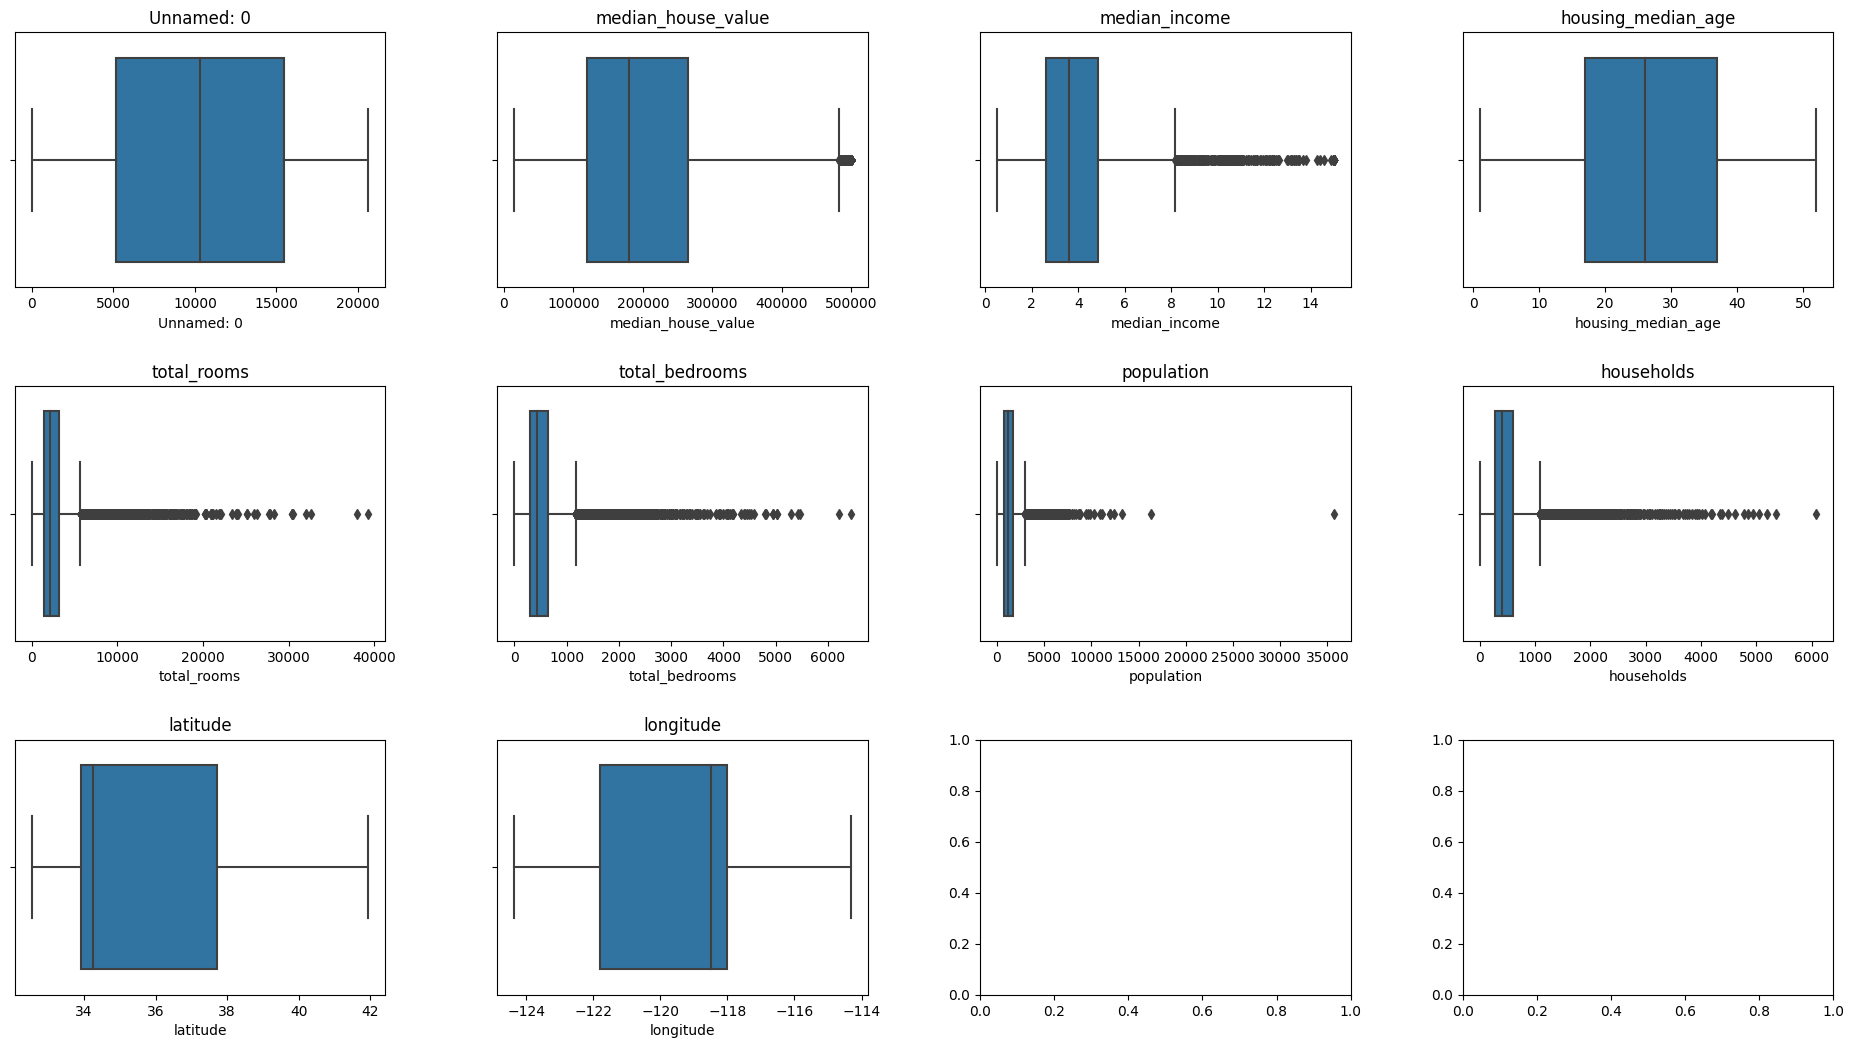

In [176]:
# Plotting box plots of the dataset to visually show the current state of
# the dataset
plot_distributions(houses05, houses05.columns)

#### Description and Understanding of the Dataset

Description of Numerical Statistics
* The dataset has 20,640 records.
* The median house value ranges from 14,999 to 500,001, with a mean of 206,855.82.
* The median income ranges from 0.5 to 15, with a mean of 3.94.
* Housing median age ranges from 1 to 52, with a mean of 27.65.
* Total rooms range from 2 to 39,320, with a mean of 2,635.76.
* Total bedrooms range from 1 to 6,445, with a mean of 537.90.
* Population ranges from 5 to 35,682, with a mean of 1,352.80.
* Households range from 1 to 6,082, with a mean of 499.54.
* Latitude ranges from 32.54 to 41.95, with a mean of 35.63.
* Longitude ranges from -124.35 to -114.31, with a mean of -119.57.

Description of Boxplots of Features from the Dataset

From looking at the boxplots, I can see that the dataset looks to be quite varied which would be beneficial for the training of any potential future models.

Distributed among the features there looks to be quite a large amount of data that lies beyond 1.5 x IQR which could indicate those datapoints to be outliers which would need to be removed as part of outlier detection before the dataset could be used for the training of a model.
* The Median house value boxplot appears to have quite a few values greater than 1.5 x IQR.
* The Median income boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Housing median age boxplot does not have any values greater than 1.5 x IQR.
* The Total rooms again boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Total bedrooms boxplot appears to have a large number of values greater than 1.5 x IQR.
* The Population boxplot has a large number of values greater than 1.5 x IQR.
* The Households boxplot has large number of values greater than 1.5 x IQR.
* The Latitude boxplot does not have any values greater than 1.5 x IQR.
* The Longitude boxplot does not have any values greater than 1.5 x IQR.

Understanding of the Dataset
* The dataset has a large number of records that will be useful for the training/validation of any potential future models, however with the large amount of data points lying greater than 1.5 x the IQR this could suggest there could be a high amount of outliers. The missing data present in this dataset will also need to be imputed before the data can be used to effectively train a model.
* The data appears to have a good degree of variance which should lead to good generalizability for any potential future models.
* Each record is the houshold as well as financial information about a geographic area located using latitude/longitude.
* From looking at the spread of the Latitude/Longitude the datapoints appear to be located primarily within the state of California in the United States of America.

#### Identifying Features with Missing Data

In [177]:
def checkMissingData(dataframe) :
    # Check for missing values in the dataset
    featuresWithMissingData = dataframe.isnull().sum()

    # Print the features with missing data
    print("Features with missing data and the amount of values with missing data : ")
    print(featuresWithMissingData[featuresWithMissingData > 0])

checkMissingData(houses05)

Features with missing data and the amount of values with missing data : 
median_income         10320
housing_median_age    10320
population            10320
dtype: int64


Commenting on the imputability of the Features with Missing Data

As the missing data is "Missing At Random", there could be a systematic reason as to why the data is missing.

Of the features with missing data, I would say that all of them are imputable due to the low percentage of data missing (0.5%) and the nature of the features with missing data.

### KNN Imputation

#### Imputate Missing Data

In [178]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

from sklearn.impute import KNNImputer

# Create the KNNImputer
knnImputer = KNNImputer(n_neighbors=2)

# Perform KNN imputation on the DataFrame
houses05KnnImputed = knnImputer.fit_transform(houses05)

# Convert the result back to a DataFrame
houses05KnnImputed = pd.DataFrame(houses05KnnImputed, columns= houses05.columns)

##### Check Imputation has been Performed

In [179]:
# Check that imputation has been performed
checkMissingData(houses05KnnImputed)

Features with missing data and the amount of values with missing data : 
Series([], dtype: int64)


#### Pre-Processing the Data

In [180]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Separate features
knnX = houses05KnnImputed.drop("median_house_value", axis=1)
knnY = houses05KnnImputed["median_house_value"]

# Split the dataset into training and testing sets
# Using 20% of the data to test the model
# Shuffles the data (using "3831" to make the shuffle reproducible) before the
# split to ensure a good variety in both datasets
knnXTrain, knnXTest, knnYTrain, knnYTest = train_test_split(knnX, knnY, test_size=0.2, random_state=3831)

#### Creating the Regression Model M1

In [181]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Create Linear Regression Model
M1 = LinearRegression()

# Training the model
M1.fit(knnXTrain, knnYTrain)

LinearRegression()

##### Using M1 to Make Predictions

In [182]:
# Make predictions based on the testing set
knnYPredictions = M1.predict(knnXTest)

#### Assessing M1's Performance

##### Using Statistical Methods

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating MSE, MAE, R^2 values for the model
# MSE/MAE should be as low as possible
# R^2 should be as close to 1 as possible
knnMSE = mean_squared_error(knnYTest, knnYPredictions)
knnMAE = mean_absolute_error(knnYTest, knnYPredictions)
knnRSquared = r2_score(knnYTest, knnYPredictions)

def knnStatistics():
    # Printing the values
    print(f"Mean Squared Error : {knnMSE}")
    print(f"Mean Absolute Error : {knnMAE}")
    print(f"R-squared: {knnRSquared}")

knnStatistics()

Mean Squared Error : 4850754505.8471985
Mean Absolute Error : 52443.71311780642
R-squared: 0.6404974431281385


##### Using Graphical Methods

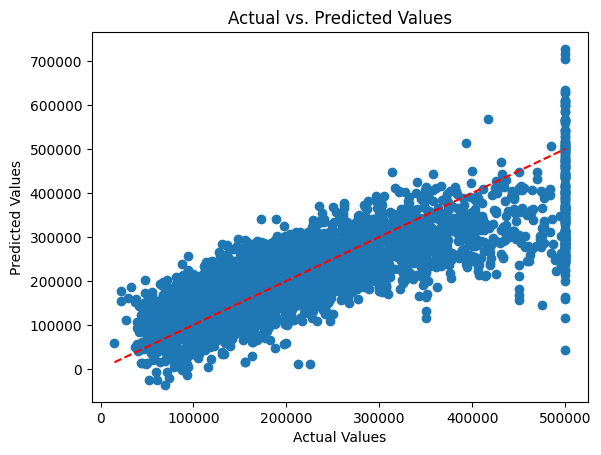

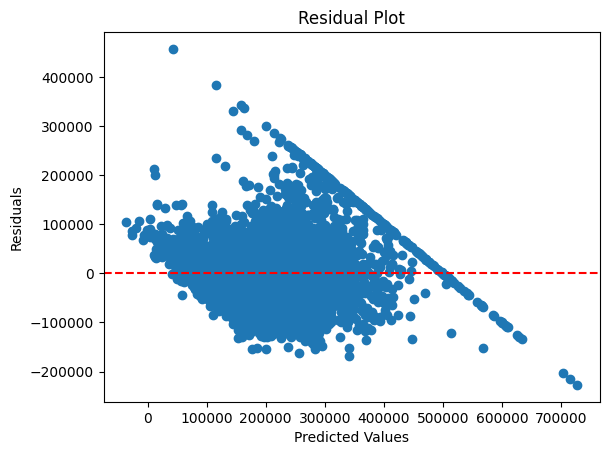

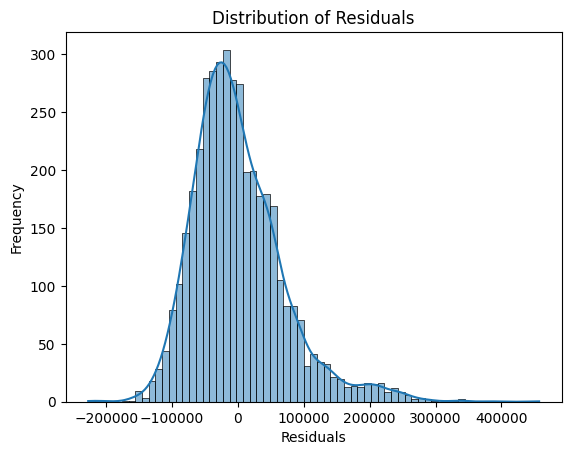

In [184]:
def knnGraphs():
    # Creating a scatter plot of actual vs predicted values
    # Ideally the points will fall along a diagonal line
    plt.scatter(knnYTest, knnYPredictions)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    # Add a diagonal line to use to compare predicted values to
    plt.plot([min(knnYTest), max(knnYTest)], [min(knnYTest), max(knnYTest)], color='red', linestyle='--')

    plt.show()

    # Calculate residuals (difference between the actual and predicted values)
    knnResiduals = knnYTest - knnYPredictions

    # Creating a scatter plot showing of residuals vs predicted values
    # A good model will have residuals evenly distributed around the horizontal
    # line at 0
    plt.scatter(knnYPredictions, knnResiduals)
    plt.axhline(y = 0, color = "r", linestyle = "--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

    # Plotting the distribution of frequency against the residuals
    # Ideally will be a normal distribution
    sns.histplot(knnResiduals, kde = True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

knnGraphs()

#### Comments on M1's Performance

I believe that the model M1 did a reasonable job at predicting the values of "median_house_value", however there are some instances where the model failed to predict correct values.
> Comments on Statistical Analysis
* The Mean Squared Error (MSE) and Mean Absolute Error (MAE) should be as low as possible to indicate a good model.
    * The MSE was (4,850,754,505.85 (rounded to 2 decimal points)) which at first looks incredibly high however due to this value being squared, MSE is incredibly sensitive to outliers - which I had already noted are present in the dataset in the EDA.
    * The MAE was (52,443.71 (rounded to 2 decimal points)), which is a far more reasonable representation of the evaluation of the model, indicates that the model was reasonably good at predicting values - espcially considering this value is under half that of the value of a standard deviation present in the feature (115,395.62).
* The R<sup>2</sup> value should be as close to 1 as possible to indicate a good model.
    * The R<sup>2</sup> value was (0.64 (rounded to 2 decimal points)), once again indicates the model was reasonably good at predicting values.

> Comments on Graphical Analysis
* For the scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
    * The scatter graph shows that the model did a reasonable job of predicting the values, however it should be highlighted that the accuracy looks to start to fail as the value increases - additionally there is a number of anomalous data points on the graph indicating that the model did fail to always predict the values accurately.
* For the scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
    * The scatter graph shows that the model predicted the values somewhat reasonably, however once again it is important to note there are quite a few anomalous data points.
* For the bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.
    * The bar chart shows that the model did a reasonable job of predicting the values, once again it should be noted that it is not a perfect normal distribution as there is a second peak after the initial peak at 0 residuals.

### MICE Imputation

#### Imputate Missing Data

In [185]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create the IterativeImputer
# Max iterations of 20 to ensure imputation is done somewhat quickly but should
#     still be accurate
# random_state = 3831 to make the random selection of estimator features
#     reproducible
miceImputer = IterativeImputer(max_iter = 20, random_state = 3831)

# Perform MICE imputation on the DataFrame
houses05MiceImputed = miceImputer.fit_transform(houses05)

# Convert the result back to a DataFrame
houses05MiceImputed = pd.DataFrame(houses05MiceImputed, columns=houses05.columns)

##### Check Imputation has been Performed

In [186]:
# Check that imputation has been performed
checkMissingData(houses05MiceImputed)

Features with missing data and the amount of values with missing data : 
Series([], dtype: int64)


#### Pre-Processing the Data

In [187]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Separate features
miceX = houses05MiceImputed.drop("median_house_value", axis=1)
miceY = houses05MiceImputed["median_house_value"]

# Split the dataset into training and testing sets
# Using 20% of the data to test the model
# Shuffles the data (using "3831" to make the shuffle reproducible) before the
# split to ensure a good variety in both datasets
miceXTrain, miceXTest, miceYTrain, miceYTest = train_test_split(miceX, miceY, test_size=0.2, random_state=3831)

#### Creating the Regression Model M2

In [188]:
# Documentation from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Create Linear Regression Model
M2 = LinearRegression()

# Training the model
M2.fit(miceXTrain, miceYTrain)

LinearRegression()

##### Using M2 to Make Predictions

In [189]:
# Make predictions based on the testing set
miceYPredictions = M1.predict(miceXTest)

#### Assessing M2's Performance

##### Using Statistical Methods

In [190]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating MSE, MAE, R^2 values for the model
# MSE/MAE should be as low as possible
# R^2 should be as close to 1 as possible
miceMSE = mean_squared_error(miceYTest, miceYPredictions)
miceMAE = mean_absolute_error(miceYTest, miceYPredictions)
miceRSquared = r2_score(miceYTest, miceYPredictions)

def miceStatistics():
    # Printing the values
    print(f"Mean Squared Error : {miceMSE}")
    print(f"Mean Absolute Error : {miceMAE}")
    print(f"R-squared: {miceRSquared}")

miceStatistics()

Mean Squared Error : 4227253347.0362825
Mean Absolute Error : 48853.65719845393
R-squared: 0.6867068030400652


##### Using Graphical Methods

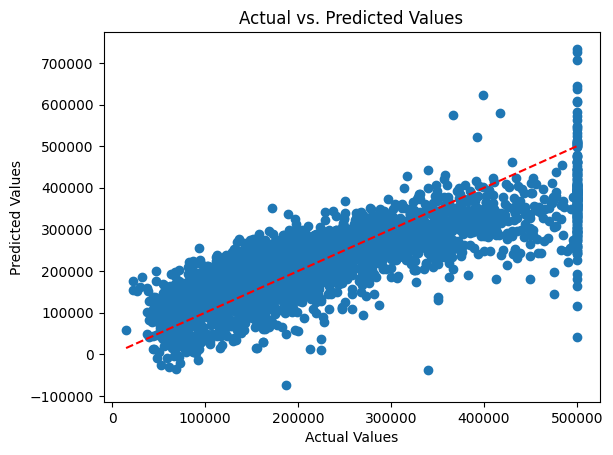

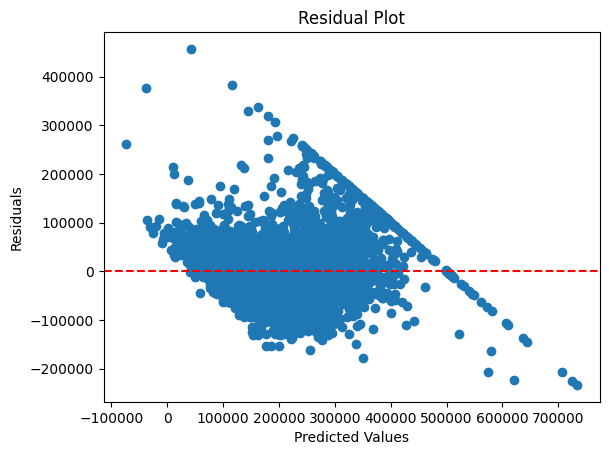

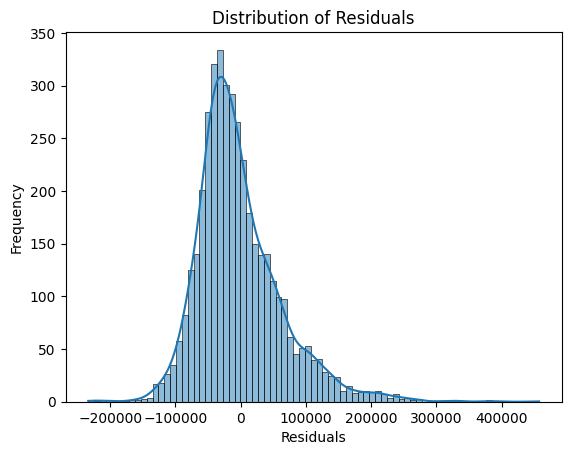

In [191]:
def miceGraphs():
    # Creating a scatter plot of actual vs predicted values
    # Ideally the points will fall along a diagonal line
    plt.scatter(miceYTest, miceYPredictions)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    # Add a diagonal line to use to compare predicted values to
    plt.plot([min(miceYTest), max(miceYTest)], [min(miceYTest), max(miceYTest)], color='red', linestyle='--')

    plt.show()

    # Calculate residuals (difference between the actual and predicted values)
    miceResiduals = miceYTest - miceYPredictions

    # Creating a scatter plot showing of residuals vs predicted values
    # A good model will have residuals evenly distributed around the horizontal
    # line at 0
    plt.scatter(miceYPredictions, miceResiduals)
    plt.axhline(y = 0, color = "r", linestyle = "--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

    # Plotting the distribution of frequency against the residuals
    # Ideally will be a normal distribution
    sns.histplot(miceResiduals, kde = True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

miceGraphs()

#### Comments on M2's Performance

I believe that the model M2 did a reasonable job at predicting the values of "median_house_value", however there are some instances where the model failed to predict correct values.
> Comments on Statistical Analysis
* The Mean Squared Error (MSE) and Mean Absolute Error (MAE) should be as low as possible to indicate a good model.
    * The MSE was (4,227,253,347.04 (rounded to 2 decimal points)) which at first looks incredibly high however due to this value being squared, MSE is incredibly sensitive to outliers - which I had already noted are present in the dataset in the EDA.
    * The MAE was (48,853.66 (rounded to 2 decimal points)), which is a far more reasonable representation of the evaluation of the model, indicates that the model was reasonably good at predicting values - espcially considering this value is under half that of the value of a standard deviation present in the feature (115,395.62).
* The R<sup>2</sup> value should be as close to 1 as possible to indicate a good model.
    * The R<sup>2</sup> value was (0.69 (rounded to 2 decimal points)), once again indicates the model was reasonably good at predicting values.

> Comments on Graphical Analysis
* For the scatter graph of Actual Values vs Predicted Values, ideally the points will fall along a perfect diagonal line where x = y indicating that the model perfectly predicted the values.
    * The scatter graph shows that the model did a reasonable job of predicting the values, however it should be highlighted that the accuracy looks to start to fail as the value increases - additionally there is a number of anomalous data points on the graph indicating that the model did fail to always predict the values accurately.
* For the scatter graph of Residuals vs Predicted Values, ideally the points will fall along the horizontal line at y = 0 indicating that the difference between the predicted value and actual value was 0 and therefore correct.
    * The scatter graph shows that the model predicted the values somewhat reasonably, however once again it is important to note there are quite a few anomalous data points.
* For the bar chart showing the Distribution of Residuals, ideally it would be a normal distribution to indicate the model did a good job of predicting the values.
    * The bar chart shows that the model did a reasonable job of predicting the values as the distribution is quite similar to a normal distribution.

### Comparison of Data Imputation Methods

#### Using Statistical Methods

In [192]:
print("=" * 55)
print("Regression Statistics for both models : ")

# Print statistical values for both models
print("Regression Statistics for M1 (KNN Imputated Dataset) : ")
knnStatistics()

print("-" * 55)

print("Regression Statistics for M2 (MICE Imputed Dataset) : ")
miceStatistics()

print("=" * 55)
print("Time Taken for both models to complete : ")

# Print time taken for models to run
print(
    "From running M1 numerous times, it tended to take between 20-25\n" +
    "seconds to complete imputation, creation of the model,\n" +
    "training of the model, prediction of values"
    )

print("-" * 55)


print(
    "From running M2 numerous times, it tended to take less than a second\n" +
    "to complete imputation, creation of the model,\n" +
    "training of the model, prediction of values"
    )

print("=" * 55)

Regression Statistics for both models : 
Regression Statistics for M1 (KNN Imputated Dataset) : 
Mean Squared Error : 4850754505.8471985
Mean Absolute Error : 52443.71311780642
R-squared: 0.6404974431281385
-------------------------------------------------------
Regression Statistics for M2 (MICE Imputed Dataset) : 
Mean Squared Error : 4227253347.0362825
Mean Absolute Error : 48853.65719845393
R-squared: 0.6867068030400652
Time Taken for both models to complete : 
From running M1 numerous times, it tended to take between 20-25
seconds to complete imputation, creation of the model,
training of the model, prediction of values
-------------------------------------------------------
From running M2 numerous times, it tended to take less than a second
to complete imputation, creation of the model,
training of the model, prediction of values


#### Using Graphical Methods

Graphs for M1 (KNN Imputed Dataset) : 


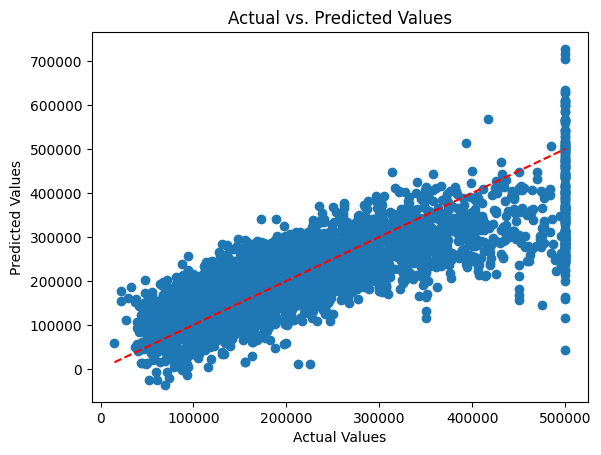

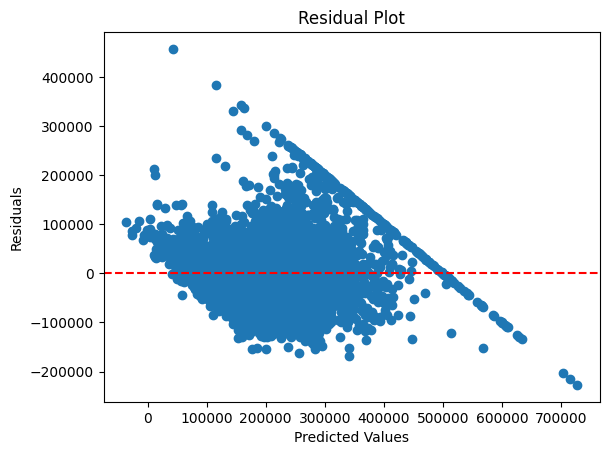

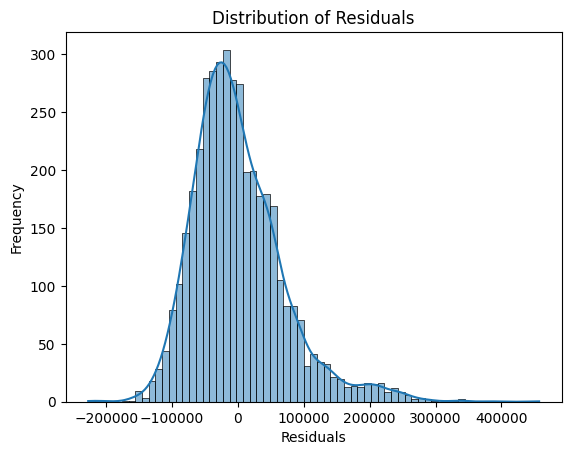

-------------------------------------------------------------------------------------
Graphs for M2 (MICE Imputed Dataset) : 


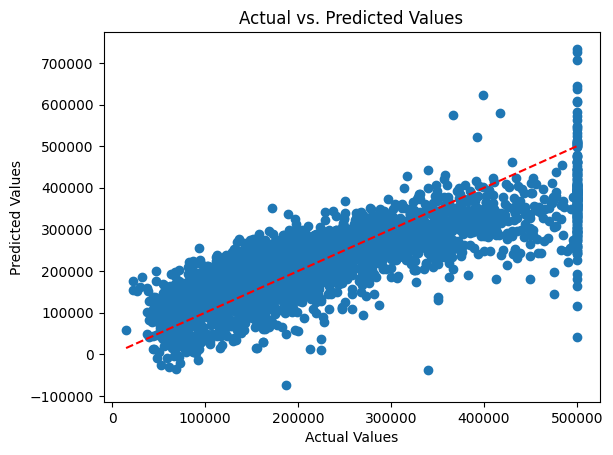

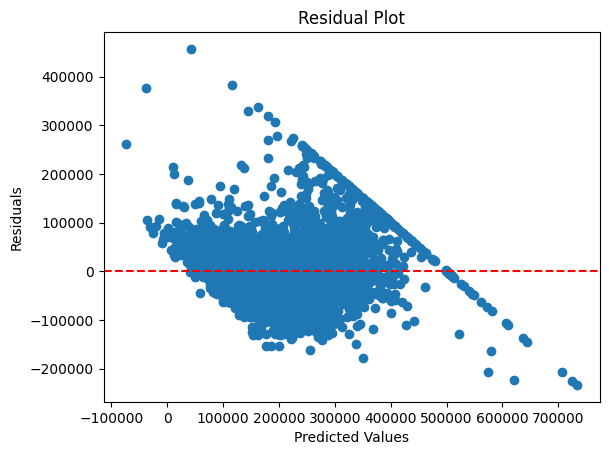

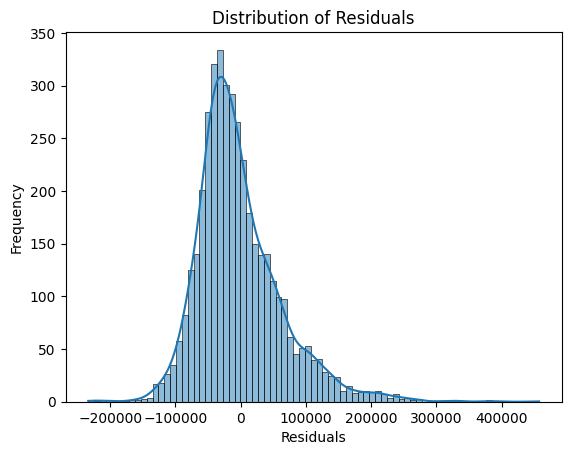

In [193]:
# Display graphs for both models
print("Graphs for M1 (KNN Imputed Dataset) : ")
knnGraphs()

print("-" * 85)

print("Graphs for M2 (MICE Imputed Dataset) : ")
miceGraphs()

### Comments on Comparison of Data Imputation Methods

M1 (KNN Imputation) :
* Mean Squared Error (MSE) : 4,850,754,505.85
* Mean Absolute Error (MAE) : 52,443.71
* R-squared : 0.64
* Time Taken : Approximately 20-25 seconds

M2 (MICE Imputation) :
* Mean Squared Error (MSE) : 4,227,253,347.04
* Mean Absolute Error (MAE) : 48,853.66
* R-squared : 0.69
* Time Taken : Less than a second

Rationale :
> Regression Performance :
* MSE and MAE : Both M1 and M2 have relatively similar performance in terms of MSE and MAE. M2 (MICE) has slightly lower MSE and MAE, indicating a marginally better fit.
* R-squared : M2 has a higher R-squared value (0.69) compared to M1 (0.64), suggesting that M2 explains a larger proportion of the variance in the dependent variable.
* The graphs for the two regression models are similar, however the graphs for M2 (MICE) are slightly closer to the ideals - reflecting the slightly better regression statistics.

> Imputation Method :
* KNN (M1) : KNN imputation is known to be effective, especially when relationships between variables are local or non-linear. However, it can be computationally expensive, which might explain the longer time taken to complete.
* MICE (M2) : MICE imputation is an iterative method that models each variable conditionally on the others. It is often computationally more efficient, which is reflected in the significantly shorter time taken to complete.

> Time Taken :
* M1 (KNN) : Taking 20-25 seconds suggests a relatively longer computational time, potentially due to the iterative nature of KNN imputation and the calculation of distances between data points.
* M2 (MICE) : Completing in less than a second indicates efficient performance, making MICE a faster alternative in this specific comparison.

### Comments on Which Data Imputation Method I would Choose

For this particular dataset I would choose to use the MICE method, as while both imputation methods provide a reasonable performance, MICE (M2) clearly has slightly better accuracy and is considerably more computationally efficient compared to KNN (M1) for this dataset. It could be that with more hyperparameter tuning of these methods that this could change - however with the testing that I have done MICE (M2) appears to perform better for this particular dataset.

One important thing to note is that the library I used to implement MICE (M2) is still currently experimental and could potentially change with no warning - potentially .
* Reference [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#:~:text=estimator%20is%20still-,experimental,-for%20now%3A%20the)